### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

# My GitHub repository.
https://github.com/DWMGOOCH/LSE_ASSIGN02_NHS_analysis

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [3]:
# Determine whether there are missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [4]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')
# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [7]:
# Determine whether there are missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [8]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [9]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')
# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [11]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [12]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.
num_loc = len(pd.unique(nc['sub_icb_location_name']))


print(" The number of unqiue locations is:",
      (num_loc))

 The number of unqiue locations is: 106


len function combine with the pd.unique function returns the number of unique values

printed out using a docstring

**Question 2:** What are the five locations with the highest number of records?



In [15]:
# Determine the top five locations based on record count.
locations = nc['sub_icb_location_name'].value_counts()

locations.head()

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

In [16]:
# Determined the bottom five locations based on record count
locations.tail()

NHS North East and North Cumbria ICB - 00N    4210
NHS Lancashire and South Cumbria ICB - 02G    4169
NHS Cheshire and Merseyside ICB - 01V         3496
NHS Cheshire and Merseyside ICB - 01T         3242
NHS Greater Manchester ICB - 00V              2170
Name: sub_icb_location_name, dtype: int64

Looked at both the top and bottom five locations based on record count. I wanted to gain a comparison between the record count of the top locations and the bottom locations - the output shows there is a significant difference in the number of records. This could be for any number of reasons: lack of services in the north, population density of each location, age of patients at each location, poor data collection.

Interesting that all of the locations that have the highest count of records are in the south of England whereas those in the bottom are in the north. Could suggest lack of available services in the northern regions compared to the south - both the below links seem to suggest a disparity in the funding for the NHS and health services between the north and south of England:

https://www.manchester.ac.uk/discover/news/nhs-fundings-north-south-divide-why-the-sicker-north-gets-less-money/

https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-017-0996-0


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.
num_service_setting = len(pd.unique(nc['service_setting']))

print("Number of service settings is:", num_service_setting)

Number of service settings is: 5


In [18]:
# Determine the number of context types.
num_context_type = len(pd.unique(nc['context_type']))

print(" The number of unqiue locations is:",
      (num_context_type))

 The number of unqiue locations is: 3


Note: Context type is a fairly insignificant variable to be recorded. The reason for this is that one of the three types is Care Related Encounter which is essentially a catch all for all appointments where a patient was involved whether that be telephone or face to face etc. 

The other two types are: 

Inconsistent Mapping: Appointment types that have been mapped but not to a Care Related Encounter are classed as Inconsistent Mapping. Which by the metadata's own admission states: Appointments under this context type conflict with the description of an appointment. Work is ongoing to improve the consistency of mapping. 

Unmapped: No record of a category against an appointment slot type. This could be due to an error receiving the data, or an appointment type has not been mapped.

Essentially the context types are Care Related or Unknown – doesn’t provide any value. 

Therefore, national category is a far more interesting variable to discuss as it takes a deeper look into context types with specific categories investigated. 

In [19]:
# Determine the number of national categories.
num_nat_cat = len(pd.unique(nc['national_category']))

print("Number of national categories is:", num_nat_cat)

Number of national categories is: 18


Clearly a deeper insight than context types as there are 18 variables which can be analysed here. 

In [20]:
# Determine the number of appointment status.
num_app_status = len(pd.unique(ar['appointment_status']))

print("Number of appointment statuses is:", num_app_status)
ar.appointment_status.value_counts()

Number of appointment statuses is: 3


Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

Again len function combined with the pd.unique function to find the number of unique values.  

Key comment to make is the count of the unknown record - unknown in appointment status, as per metadata, is defined as "in some cases (3%–6% of monthly appointments), the final status of an appointment remains as ‘Booked’. It is not known from the data whether these appointments were attended. For this reason, the status of these 
appointments are reported as 'Unknown'." 3% - 6% is quite a large amount of appointments to be unknown, at its highest nearly 1\16 appointments has an unknown status. When dealing with millions of records that is a significantly high number to not be recorded correctly.


This could seriously impact the ability to make accurate insights later in the analysis. This suggests early signs of poor data collection.

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [21]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [23]:
# Head of the ar DataFrame to check how what the date of appointment month looks like
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [24]:
# Check the data types of the ad DataFrame
# datatime64 appears because kernal had to be rerun 
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [25]:
# Check the data types of the nc DataFrame
# datatime64 appears because kernal had to be rerun 
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [26]:
# Check the data types of the ar DataFrame
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [27]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = ad['appointment_date'].astype('datetime64')
# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [28]:
# Check that the change of data type worked 
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [29]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = nc['appointment_date'].astype('datetime64')
# View the DateFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [30]:
# Check all the change of data types has worked
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [31]:
# Change the date format of ar['appointment_date'].
ar['appointment_month'] = ar['appointment_month'].astype('datetime64')
# View the DateFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [1093]:
# Check column type has changed
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [33]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print(ad['appointment_date'].min())
print(ad['appointment_date'].max())
print("Appointments from the ad DataFrame were scheduled between:",
      (ad['appointment_date'].min()), 'and', (ad['appointment_date'].max()))

2021-12-01 00:00:00
2022-06-30 00:00:00
Appointments from the ad DataFrame were scheduled between: 2021-12-01 00:00:00 and 2022-06-30 00:00:00


In [34]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(nc['appointment_date'].min())
print(nc['appointment_date'].max())

print("Appointments from the nc DataFrame were scheduled between:",
      (nc['appointment_date'].min()), 'and', (nc['appointment_date'].max()))

2021-08-01 00:00:00
2022-06-30 00:00:00
Appointments from the nc DataFrame were scheduled between: 2021-08-01 00:00:00 and 2022-06-30 00:00:00


In [35]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

print("Appointments from the ar DataFrame were scheduled between:",
      (ar['appointment_month'].min()), 'and', (ar['appointment_month'].max()))

2020-01-01 00:00:00
2022-06-01 00:00:00
Appointments from the ar DataFrame were scheduled between: 2020-01-01 00:00:00 and 2022-06-01 00:00:00


Checking the dates for each DataFrame helps understand each data set and the range in which the data was recorded. 

The min and max dates for each DataFrame are significantly different - inconsistent data collection. Issue with changing the ar['appointment_month'] to dattime as it changes all the dd to 01. 

Worryingly looking at the metadata there have been issues with data collected regards appointment status from November 2018 onwards as well as issues with some practices using the Cegedim GP system from July 2019 onwards - which covers all of the above databases.

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [36]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_subset = nc.loc[
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
    (nc['appointment_date'].between('2022-01-01', '2022-06-01'))
]
# View the output.
nc_subset

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


In [256]:
# Check which service setting has the most appointments
nc_subset.groupby(nc_subset['service_setting'])\
    .sum().reset_index().sort_values(by='count_of_appointments', ascending=False)

,service_setting,count_of_appointments
1,General Practice,4804239
4,Unmapped,391106
2,Other,152897
3,Primary Care Network,109840
0,Extended Access Provision,98159


In [37]:
# Check the number of records for each service setting
print(nc_subset.service_setting.value_counts())

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64


As expected, General Practice comes out on top with the highest number of records - most common mode of appointment which serves population of the UK. Limitation is that Other is the second highest record count - as per metadata, Other relates to services provided by another service - would be helpful to know what these ‘other’ services are and if there is a particular service frequently used by patients. 

Interesting to see unmapped had the lowest record count but has the second highest count of appointments for this time period - why so many counts per record? Looking at the metadata, Unmapped regards service setting is defined as " category data is not received, an appointment is assigned to an ‘Unmapped’ setting." Loss of data here - if the majority of these unmapped where say Primary Care Provision it would paint a different story of the service setting used in North West London.

**Question 3:** Which month had the highest number of appointments?

In [38]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year,
                                     nc['appointment_date'].dt.month]).sum().sort_values(ascending=False)

appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64

Count of appointments split into year and month array - helps analyse which month in which year had the highest count of appointments - sorted in descending order. 

There is a loose trend identified from this pattern which sees a rise in appointments during the Autumn months of September, October and November and a fall during the Winter months. Additionally, there is a significant drop off in appointments between March and April. 

Limitation is due to the range of the data for the nc DataFrame as there isn’t a repeat of months. This could be beneficial, as it could show the drop off in appointments between March and April is a recurring event.  

**Question 4:** What was the total number of records per month?

In [39]:
# Total number of records per month.
(nc.appointment_month.value_counts())

2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: appointment_month, dtype: int64

In [396]:
nc.groupby(['appointment_month']).sum().reset_index().sort_values(
    by='count_of_appointments', ascending=False)

,appointment_month,count_of_appointments
3,2021-11,30405070
2,2021-10,30303834
7,2022-03,29595038
1,2021-09,28522501
9,2022-05,27495508
10,2022-06,25828078
5,2022-01,25635474
6,2022-02,25355260
4,2021-12,25140776
8,2022-04,23913060


For the nc DataFrame there seems to be a loose relationship between the number of records and the sum count of appointments for each month – March 2022 highest count of records and third highest number of appointments & August 2021 lowest record count and lowest number of appointments. 

The one month to comment on is Oct 2021 which ranks 6th (middle value) for record count but then ranks second highest for sum count of appointments – why such a disparity between the two. 

In [393]:
(ar.appointment_month.value_counts())

2020-03    21350
2020-01    20889
2021-11    20766
2020-02    20689
2021-10    20562
2022-03    20532
2021-09    20441
2021-12    20393
2022-05    20276
2022-06    20231
2022-01    20225
2022-02    20133
2020-10    20122
2022-04    20073
2020-09    20043
2021-07    19899
2021-06    19814
2021-08    19786
2020-11    19675
2020-07    19502
2021-04    19452
2020-12    19394
2021-05    19384
2021-03    19369
2021-01    19319
2020-08    19247
2020-04    19124
2021-02    18949
2020-06    18844
2020-05    18338
Name: appointment_month, dtype: int64

In [398]:
ar.groupby(['appointment_month']).sum().reset_index().sort_values(
    by='count_of_appointments', ascending=False)

,appointment_month,count_of_appointments
22,2021-11,30405070
21,2021-10,30303834
26,2022-03,29595038
20,2021-09,28522501
9,2020-10,28301932
28,2022-05,27495508
14,2021-03,27225424
0,2020-01,27199296
17,2021-06,26784182
8,2020-09,26714255


March 2020 is the month which has the highest number of records for the ar database. ar database records start long before the nc and ad DataFrames. 

Similarity between the number of appointments and count of records for the common months of the nc and ar database.

Highlights the limitation of the nc database where there isnt repeat months. Must be noted that the count of appointment for 2020 and the first half of 2021 will be affected by the Covid-19 pandemic - could be a reason why the nc database starts from August 2021 - the values for these years could provide misleading insights if Covid wasn't accounted for. 

Interestingly for the ar dataframe you can identify some commonalities in terms of appointment count. For instance, April for the years 2022 and 2021 rank 19th and 20th for the most appointments, whilst 2020 is 29th (Covid related).

Also see that September and October (2020 and 2021) and March (2021 and 2022) (March 2020 drop will be Covid related) feature twice in the top 10 for count of appointments - signs that the trend in count of appointments identified earlier is a regular occurrence.  

# Extra Analysis

In [309]:
# Check the top five locations based on record count from nc
nc['sub_icb_location_name'].value_counts().head()

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

I wanted to check the location which had the highest count of records being North West London ICB - W2U3Z

In [1053]:
# Create a DataFrame to log the location with the most records
nth_west_ldn = nc[nc['sub_icb_location_name']
                  == 'NHS North West London ICB - W2U3Z']
# View the DataFrame
nth_west_ldn.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
794321,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,607,2021-08
794322,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,6,2021-08
794323,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,47,2021-08
794324,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Walk-in,74,2021-08
794325,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Planned Clinics,98,2021-08


In [337]:
# Determine the sum of appointments per each service setting
nth_west_ldn.groupby(['service_setting'])\
    .sum('count_of_appointments').reset_index().sort_values(by='count_of_appointments', ascending=False)

,service_setting,count_of_appointments
1,General Practice,10432225
4,Unmapped,904234
2,Other,343642
3,Primary Care Network,240283
0,Extended Access Provision,222006


In [955]:
# Determine the count of records for each service setting
nth_west_ldn['service_setting'].value_counts()

General Practice             4609
Other                        2858
Primary Care Network         2791
Extended Access Provision    2415
Unmapped                      334
Name: service_setting, dtype: int64

General Practice as expected the top for sum of appointments and record count for each service setting. 

However, it should be commented on that the unmapped service setting ranks second for the count of appointments and last for the record count - signals poor data collection that there are so many unmapped services and such a disparity. 
 
 
For context Unmapped for service setting, as per the metadata, is defined as: "Where category data is not received, an appointment is assigned to an ‘Unmapped’ setting. Suggest poor logistics from the NHS in terms of recording the data.

In [345]:
# Determine the sum of appointments for context type
nth_west_ldn.groupby(['context_type'])\
    .sum('count_of_appointments').reset_index().sort_values(by='count_of_appointments', ascending=False)

,context_type,count_of_appointments
0,Care Related Encounter,9988582
1,Inconsistent Mapping,1249574
2,Unmapped,904234


In [52]:
# Determine the count of records for each context type
nth_west_ldn['context_type'].value_counts()

Care Related Encounter    11451
Inconsistent Mapping       1222
Unmapped                    334
Name: context_type, dtype: int64

Less of an issue with recording the unmapped context types in that it is bottom of both sum of records and value count. Although must be mentioned there are only two other context types where as there is four other service settings.  

Still a large number of unmapped context types - unmapped defined as " No record of a category against an appointment slot type. This could be due to an error receiving the data, or an appointment type has not been mapped." 

Suggests real problems with data collection and hints toward limitations in being able to offer any valuable insights. 

In [380]:
# Determine the bottom location based on record count
nc['sub_icb_location_name'].value_counts().tail()

NHS North East and North Cumbria ICB - 00N    4210
NHS Lancashire and South Cumbria ICB - 02G    4169
NHS Cheshire and Merseyside ICB - 01V         3496
NHS Cheshire and Merseyside ICB - 01T         3242
NHS Greater Manchester ICB - 00V              2170
Name: sub_icb_location_name, dtype: int64

In [382]:
# Create a DataFrame to log the location with the most records
grt_manc_00v = nc[nc['sub_icb_location_name']
                  == 'NHS Greater Manchester ICB - 00V']
# View the DataFrame
grt_manc_00v

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
32924,2021-08-02,E54000057,NHS Greater Manchester ICB - 00V,Unmapped,Unmapped,Unmapped,2327,2021-08
32925,2021-08-03,E54000057,NHS Greater Manchester ICB - 00V,Unmapped,Unmapped,Unmapped,2347,2021-08
32926,2021-08-03,E54000057,NHS Greater Manchester ICB - 00V,General Practice,Care Related Encounter,Care Home Visit,8,2021-08
32927,2021-08-04,E54000057,NHS Greater Manchester ICB - 00V,Unmapped,Unmapped,Unmapped,2315,2021-08
32928,2021-08-04,E54000057,NHS Greater Manchester ICB - 00V,General Practice,Care Related Encounter,Care Home Visit,7,2021-08
...,...,...,...,...,...,...,...,...
35089,2022-06-30,E54000057,NHS Greater Manchester ICB - 00V,General Practice,Care Related Encounter,Clinical Triage,306,2022-06
35090,2022-06-30,E54000057,NHS Greater Manchester ICB - 00V,General Practice,Care Related Encounter,Care Home Visit,15,2022-06
35091,2022-06-30,E54000057,NHS Greater Manchester ICB - 00V,Extended Access Provision,Care Related Encounter,General Consultation Acute,1,2022-06
35092,2022-06-30,E54000057,NHS Greater Manchester ICB - 00V,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [383]:
# Determine the sum of appointments per each service setting
grt_manc_00v.groupby(['service_setting'])\
    .sum('count_of_appointments').reset_index().sort_values(by='count_of_appointments', ascending=False)

,service_setting,count_of_appointments
4,Unmapped,430394
1,General Practice,207797
0,Extended Access Provision,942
3,Primary Care Network,74
2,Other,4


In [384]:
# Determine the record count of each service setting
grt_manc_00v['service_setting'].value_counts()

General Practice             1586
Extended Access Provision     281
Unmapped                      279
Primary Care Network           22
Other                           2
Name: service_setting, dtype: int64

Greater issue here with the lowest location. Unmapped ranks the highest, by some way, for the number of appointments. For a location which has significantly less appointments than the North West London location it is worrying how many of its appointments are unmapped. How is such a high proportion of this locations data regards services being unmapped - again hints towards logistics in terms of data entry at the locations.

In [437]:
# Determine the sum of appointments for context type
grt_manc_00v.groupby(['context_type'])\
    .sum('count_of_appointments').reset_index().sort_values(by='count_of_appointments', ascending=False)

,context_type,count_of_appointments
2,Unmapped,430394
0,Care Related Encounter,171608
1,Inconsistent Mapping,37209


In [387]:
# Determine the count of records for each context type
grt_manc_00v['context_type'].value_counts()

Care Related Encounter    1562
Inconsistent Mapping       329
Unmapped                   279
Name: context_type, dtype: int64

The same story as service settings appears here with context types. Unmapped is again the highest for the sum of records and has a disproportionately higher sum of values compared to the count. 

Again it is unfortunate that at this stage the main focus is on the poor data collection. 

The overall comment regards the unmapped analysis is that if these services were properly recorded it could provide an interesting insight into which locations are dependant on what services. It would be sensible to expect General Practice to rank at the top of services for each location. 

However, say that half of the unmapped appointments were actually Primary Network care for the Greater Manchester location research could be implemented to ensure that there are the necessary services in that location to deal with the appointments. 

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [62]:
# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [538]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype('str')
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [525]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting']
                   ).sum().reset_index()
# View output.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


Subsetted the nc the data frame to show the count of appointments per months for each service. Enables visualisations to be created to determine any obvious patterns. 

Early indications suggest that General Practice will be distinctly higher than the other service settings for each month. Again the comment has to be made that there are a large amount of unmapped appointments which will hinder the quality of insights we can infer.

**Service settings:**

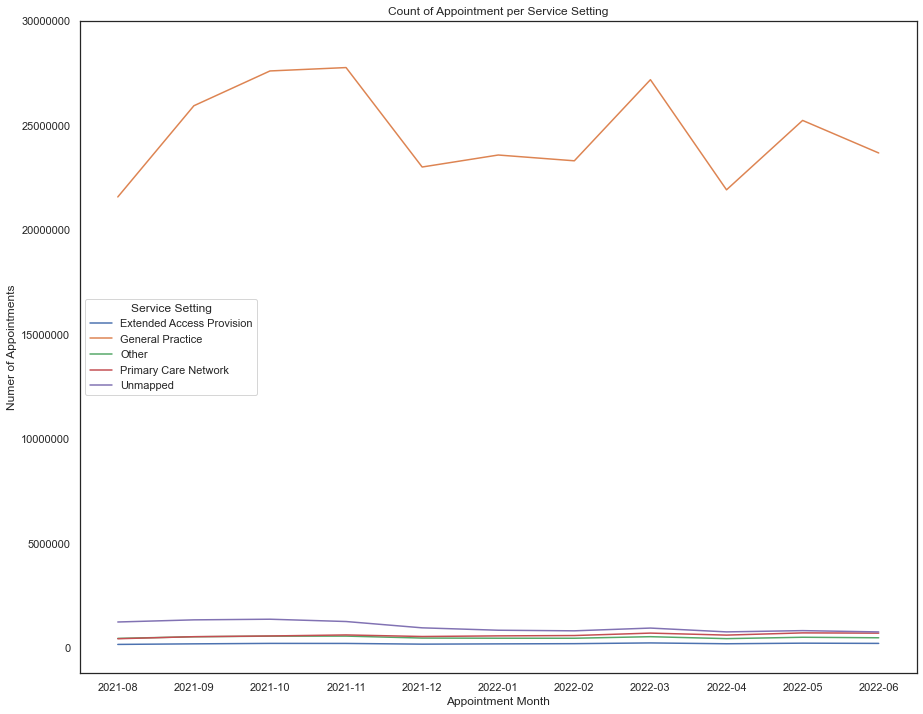

In [1058]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
nc_ss_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
                        hue='service_setting', data=nc_ss, ci=None)

# Customise and tidy the plot.
nc_ss_ax.legend(title='Service Setting', loc='center left')
nc_ss_ax.set_xlabel('Appointment Month')
nc_ss_ax.set_ylabel('Numer of Appointments')
nc_ss_ax.set_title("Count of Appointment per Service Setting")
nc_ss_ax.set_yticks([0, 5000000, 10000000, 15000000,
                    20000000, 25000000, 30000000])
nc_ss_ax.set_yticks([2500000, 7500000, 12500000, 17500000,
                     22500000, 27500000], minor=True)
nc_ss_ax.set_yticklabels(
    ['0', '5000000', '10000000', '15000000', '20000000', '25000000', '30000000'])

plt.savefig('nc_ss_ax.png')

Unsurprisingly, there is a significant gap between the General Practice and the rest of the service settings. Makes the graph difficult to read due to the significant white space. Therefore, all of the below analysis will focus on the General Practice (GP) service setting. Analysis of the other service settings will be provided beneath a lineplot following this analysis. 

General Practice appointments follow the trend for overall appointments identified earlier in the analysis. 

Over autumn there is quite a sharp rise in appointments for the end of summer (August 2021). Rise of nearly 500000 appointments in one month (2021-08: 21575852, 2021-09: 25940821). Appointments continue to rise during autumn and peak out at 27767889 in November. This rise in appointments is unsurprising due to the change in the season from the summer, and is often a time when people start to feel ill and might require the services of a GP.  

There is a significant fall from the peak in November (27767889) to the start of December (23008818). The line flattens out during the Winter season. At first this might seem surprising as you may think that during the winter individuals fall ill and would require General Practice services. However, the likely cause of this is the effect of Christmas and New Year and subsequent knock-on over January. This is a key holiday season where people are likely to be off work, socialising more and therefore less likely to be looking at attending appointments at the GP. 

Spring is the most interesting season to look at, particularly with the month of April. This season experiences the biggest fluctuation over the three-month period. The season starts off with the third highest number of appointments for the analysed months being March 2022: 27187368, however experiences a sharp drop to the second lowest value in April 2022: 21916791. The drop in April 2022 is peculiar - could be down to Easter Holidays and children off school and two bank holidays creating a four day weekend but further analysis of the month would be needed to confirm this. 

Can’t infer any relationship for the summer months as they aren’t recorded. Could suggest that there might be a fall as appointments drop in June 2022 and are the lowest in August 2021. Additionally, whilst it is a separate dataset the summer months in the ar data set consistently ranked in the bottom half for number of appointments.  

This is one of the short falls of the nc data as there is not any summer months or repeat of any months from this DataFrame. It could have been helpful to have the data extended back to see if there is a consistent pattern for autumn, winter and spring months.

In [536]:
nc_ss[nc_ss['service_setting'] == 'General Practice']

,appointment_month,service_setting,count_of_appointments
1,2021-08,General Practice,21575852
6,2021-09,General Practice,25940821
11,2021-10,General Practice,27606171
16,2021-11,General Practice,27767889
21,2021-12,General Practice,23008818
26,2022-01,General Practice,23583053
31,2022-02,General Practice,23305934
36,2022-03,General Practice,27187368
41,2022-04,General Practice,21916791
46,2022-05,General Practice,25238620


In [434]:
# Subset the data to remove General Practice
nc_ex_gp = nc_ss[nc_ss['service_setting'] != 'General Practice']
# View DataFrame
nc_ex_gp.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906


Because of amount of white space in the nc_ss graph, I created a subset of the data to exclude General Practice. This would then allow a new lineplot to be created where the trends could be better understood. 

!= excludes the stated varible, in this case General Practice 

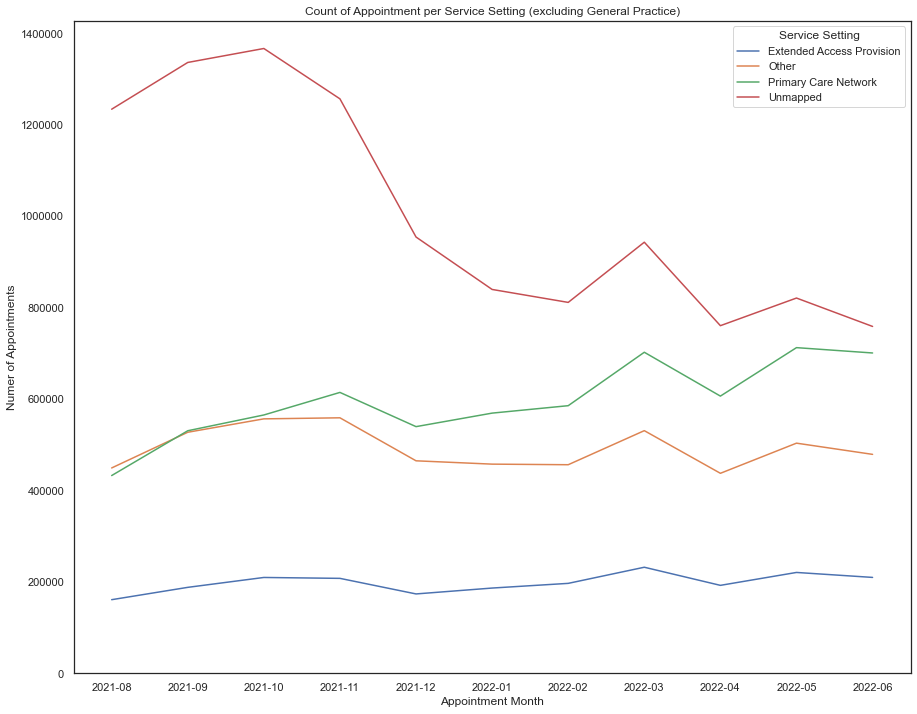

In [1059]:
# Create a lineplot showing service setting excluding General Practice
ex_gp_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
                        hue='service_setting', data=nc_ex_gp, ci=None)

# Customise and tidy the plot.
ex_gp_ax.set_xlabel('Appointment Month')
ex_gp_ax.set_ylabel('Numer of Appointments')
ex_gp_ax.set_title(
    "Count of Appointment per Service Setting (excluding General Practice)")
ex_gp_ax.legend(title='Service Setting', loc='upper right')
ex_gp_ax.set_yticks([0, 200000, 400000, 600000,
                    800000, 1000000, 1200000, 1400000])
ex_gp_ax.set_yticks([100000, 300000, 500000, 700000,
                     900000, 1100000, 1300000], minor=True)
ex_gp_ax.set_yticklabels(
    ['0', '200000', '400000', '600000',
                    '800000', '1000000', '1200000', '1400000'])

plt.savefig('ex_gp_ax.png')

Can visualise the trends over seasons much easier for the other service setting now General Practice has been removed.

Some interesting insights to discuss here: 

Firstly, 'Other' service setting follows a similar trend to the General Practice in the previous visualisation. Highs in terms of appointments over the autumn period, a fall and flattening of the appointment line during winter and then fluctuations in the spring. It is difficult to provide any real insight into why there are these differences like you can with General Practice because Other is defined as: "Appointments delivered in the practice by another provider". Suggestion for future analysis would be to gain a deeper insight into what services make up ‘Other’. 

Primary Care Network sees a steady increase in terms of count of appointments over the analysed period. Only service setting to experience such an increase (Note: Extended Access Provision does see an increase, but this is only marginal). Notable discussion regarding Primary Care Network is that it doesn't experience a consistent drop in appointments over the winter like General Practice and Other. Probably because these appointments, such as  care home drop ins, are unlikely to be affected by winter holidays - this service will always need to be delivered. Further analysis would need to be required to determine why there is a rise in appointments for Primary Care - would be sensible to predict that more patients were admitted to care homes etc. but this is only speculation. Could coming out of COVID-19 have an affect on primary care network - house visits for medication could be provided again? Outside services allowed to visit care homes etc. Would be interesting to see if this rise is due to Covid or if there has been a rise in care home admissions or the need for medication delivered to patients – could indicate a strain on services. 

Last service setting worth discussing is Unmapped, which experiences a significant decline over the analysed period from a high of 1366656 in 2011-11 to a low of 758640 in 2022-06. As discussed throughout this anaylsis / notebook there are issues with the amount of services being recorded as Unmapped as this suggests an error when receiving the data or poor systems by the healthcare provider. However, it is positive to see a fall in these records suggesting better data collection as the time period progresses.

In [1094]:
# Check the count of appointments for Unmapped
# Used for analysis above
nc_ex_gp[nc_ex_gp['service_setting'] == 'Unmapped']

,appointment_month,service_setting,count_of_appointments
4,2021-08,Unmapped,1233843
9,2021-09,Unmapped,1336115
14,2021-10,Unmapped,1366656
19,2021-11,Unmapped,1256496
24,2021-12,Unmapped,954257
29,2022-01,Unmapped,839562
34,2022-02,Unmapped,811246
39,2022-03,Unmapped,942912
44,2022-04,Unmapped,760313
49,2022-05,Unmapped,820770


**Context types:**

In [66]:
# Create a separate data set that can be used in future weeks.
nc_ct = nc.groupby(['appointment_month', 'context_type']).sum().reset_index()
# View output.
nc_ct.head(10)

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


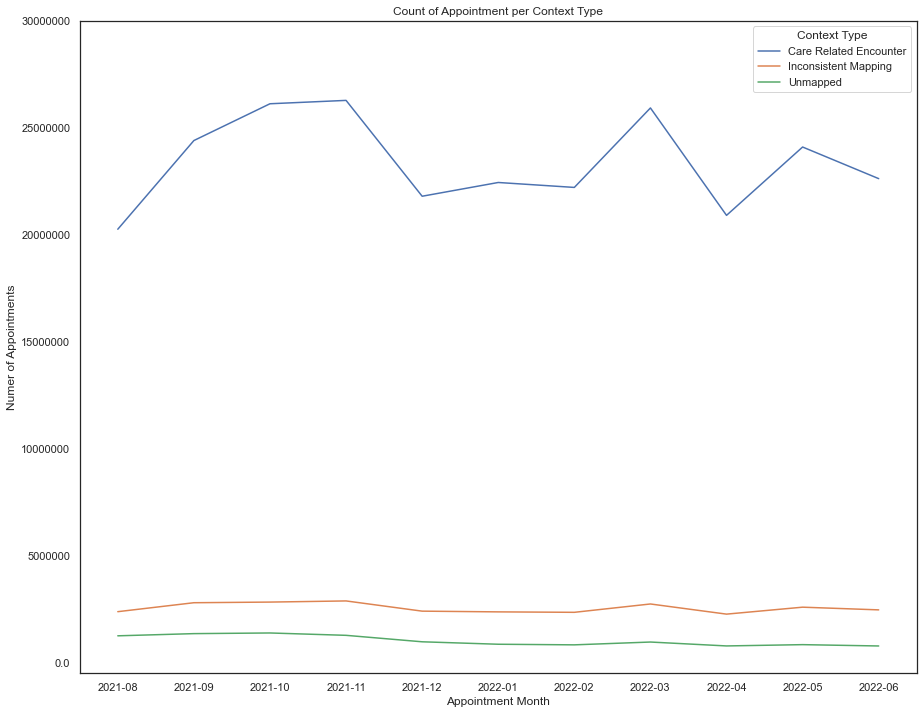

In [1060]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
# Create a lineplot
nc_ct_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
                        hue='context_type', data=nc_ct, ci=None)

# Customise and tidy the plot.
nc_ct_ax.set_xlabel('Appointment Month')
nc_ct_ax.set_ylabel('Numer of Appointments')
nc_ct_ax.set_title("Count of Appointment per Context Type")
nc_ct_ax.set_yticks([0, 5000000, 10000000, 15000000,
                    20000000, 25000000, 30000000])
nc_ct_ax.legend(title='Context Type', loc='upper right')
nc_ct_ax.set_yticklabels(['0.0', '5000000', '10000000', '15000000',
                          '20000000', '25000000', '30000000'])

plt.savefig('nc_ct_ax.png')

This graph offers very little in terms of insights. This major downfall here is not necessarily the graph, though there is a lot of white space, but how context types is recorded. As discussed earlier in the Notebook, Care Related Encounters is a catch all for appointments where a patient was involved whether that be telephone or face to face etc.
Therefore, you would expect Care Related Encounters to be significantly higher than inconsistent mapping and unmapped. National Categories below takes a deep look into context types and provides more context to the discussion. 

It is worth noting that this graph does show, especially in comparison to the service settings, a low count Inconsistent Mapping or Unmapped. Though this is probably because there is only three options so it is easy to register something as one or the other. The difference between the sum of appointments is shown in the table below. 

Perhaps going forward context type could become a bit more specific to provide some more context to the conversation.

In [543]:
nc_ct.groupby(['context_type']).sum().reset_index()

,context_type,count_of_appointments
0,Care Related Encounter,257075158
1,Inconsistent Mapping,27890802
2,Unmapped,11080810


**National categories:**

In [68]:
# Create a separate data set that can be used in future weeks.
nc_nc = nc.groupby(
    ['appointment_month', 'national_category']).sum().reset_index()
# View output.
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


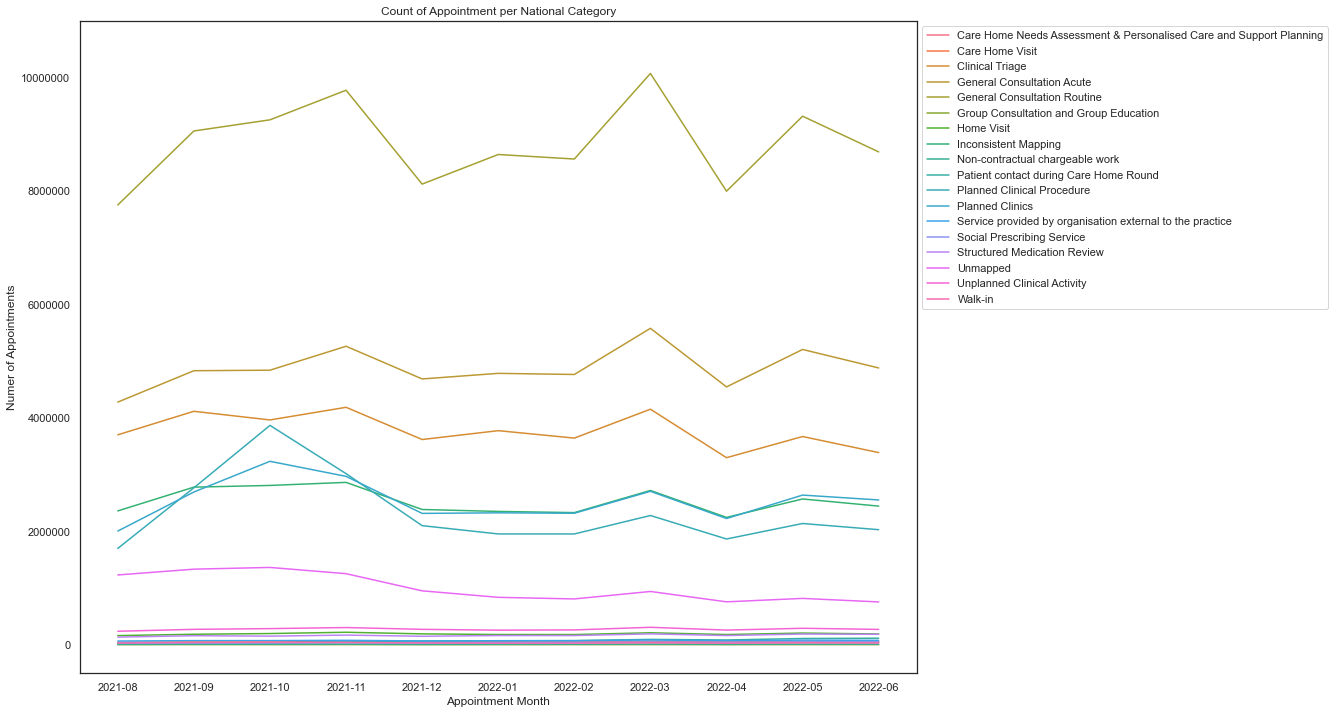

In [1061]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
nc_nc_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
                        hue='national_category', data=nc_nc, ci=None)

# Customise and tidy the plot
nc_nc_ax.legend(bbox_to_anchor=(1, 1))
nc_nc_ax.set_xlabel('Appointment Month')
nc_nc_ax.set_ylabel('Numer of Appointments')
nc_nc_ax.set_title("Count of Appointment per National Category")
nc_nc_ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000])
nc_nc_ax.set_yticks([1000000, 3000000, 5000000, 7000000,
                     9000000, 11000000], minor=True)
nc_nc_ax.set_yticklabels(['0', '2000000', '4000000', '6000000',
                          '8000000', '10000000'])

plt.savefig('nc_nc_ax.png')

Not going to comment too much on this graph for a couple of reasons: 

One it is quite cluttered due to the number of national categories.

The gap between the count of appointments for General Consultation Routine and the bottom values (unable to even infer which line is at the bottom) is too large, clustering the bottom national categories.

The legend is so large, due to the number of categories, that if it is on the graph it takes up too much space and if moved off the graph it makes the graph difficult to read.

Therefore, using the table below I have grouped the categories but their count of appointments and then split the categories from unmapped higher and unplanned clinical activity and below. The reason for this split is at this point there is a significant difference between the count of appointments, a jump by nearly 8 million appointments.

In [558]:
# Determine the count of appointment for each national category to see how best to split the data
nc_nc.groupby(['national_category']).sum().reset_index()\
    .sort_values(by='count_of_appointments', ascending=False)

,national_category,count_of_appointments
4,General Consultation Routine,97271522
3,General Consultation Acute,53691150
2,Clinical Triage,41546964
11,Planned Clinics,28019748
7,Inconsistent Mapping,27890802
10,Planned Clinical Procedure,25702694
15,Unmapped,11080810
16,Unplanned Clinical Activity,3055794
6,Home Visit,2144452
14,Structured Medication Review,1858379


National categories ordered by the number of appointments. Decided to split from Unmapped and above \ Unplanned Clinical Activity and below because this is national categories either side of 10 million appointments. Quite a large gap betwen Unmapped and Unplanned Clinical Activity so seemed sensible to split here.

In [549]:
# Create a new DataFrame featuring the national categories with 10 million + appointments 
nc_nc_top = nc_nc[(nc_nc['national_category'].isin(['General Consultation Routine',
                                                    'General Consultation Acute',
                                                    'Clinical Triage', 'Planned Clinics',
                                                    'Inconsistent Mapping', 'Planned Clinical Procedure',
                                                    'Unmapped']))]

# View the DataFrame
nc_nc_top

,appointment_month,national_category,count_of_appointments
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
7,2021-08,Inconsistent Mapping,2363093
10,2021-08,Planned Clinical Procedure,1701814
...,...,...,...
184,2022-06,General Consultation Routine,8691384
187,2022-06,Inconsistent Mapping,2447611
190,2022-06,Planned Clinical Procedure,2032073
191,2022-06,Planned Clinics,2556175


In [522]:
# Great a new DataFrame to include all national categories which have less than 10 million appointments
nc_nc_bottom = nc_nc[(nc_nc['national_category']'
                      '.isin(['Unplanned Clinical Activity',
                                                       'Home Visit', 'Structured Medication Review',
                                                       'Service provided by organisation external to the practice',
                                                       'Patient contact during Care Home Round',
                                                       'Care Home Visit', 'Social Prescribing Service',
                                                       'Walk-in',
                                                       'Care Home Needs Assessment & Personalised Care and Support Planning',
                                                       'Non-contractual chargeable work',
                                                       'Group Consultation and Group Education']))]
nc_nc_bottom

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care and Support Planning,29676
1,2021-08,Care Home Visit,47583
5,2021-08,Group Consultation and Group Education,5161
6,2021-08,Home Visit,165061
8,2021-08,Non-contractual chargeable work,10775
...,...,...,...
192,2022-06,Service provided by organisation external to the practice,81663
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
196,2022-06,Unplanned Clinical Activity,274491


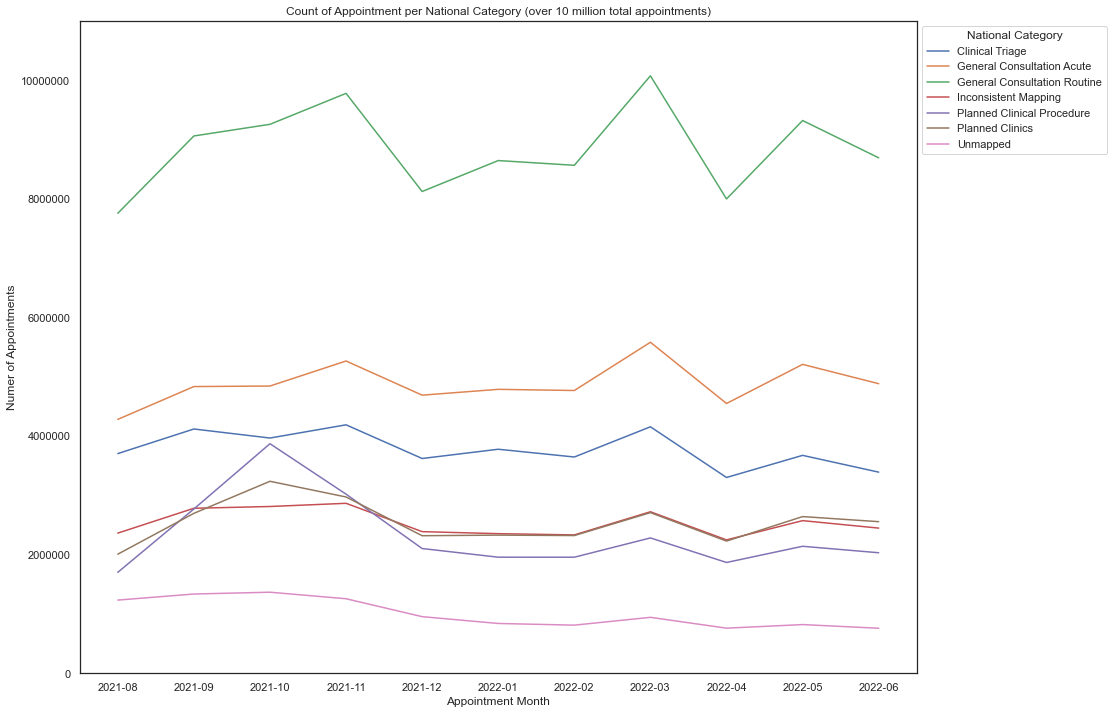

In [1062]:
# Plot the appointments over the available date range, and review the top national categories for months.
# Create a lineplot.
top_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
                      hue='national_category', data=nc_nc_top, ci=None)
# Customise and tidy the plot
top_ax.legend(title='National Category', bbox_to_anchor=(1, 1))
top_ax.set_xlabel('Appointment Month')
top_ax.set_ylabel('Numer of Appointments')
top_ax.set_title("Count of Appointment per National Category (over 10 million total appointments)")
top_ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000])
top_ax.set_yticks([1000000, 3000000, 5000000, 7000000,
                   9000000, 11000000], minor=True)
top_ax.set_yticklabels(['0', '2000000', '4000000', '6000000',
                        '8000000', '10000000'])

plt.savefig('top_ax.png')

Unsurprisingly, General Consultation Routine has consistently the highest count of appointments, this is because these appointments are likely to be General Practice appointments - this pattern follows a similar pattern to the General Practice line in the service setting graph. 

It should be noted that whilst Unmapped features at the bottom of this graph these are for categories have over 10 million appointments total which is a significant amount. Especially when there is difference of 8 million total appointments between Unmapped and the next national category. This again hints toward poor data collection and hinders the ability to make interesting insights. 

Each line generally follows the trend we have seen over seasons and months:

Where there is a steady rise in the count of appointments during the autumn months, a fall in appointments over the winter and levelling out of the lines and then a sharp spike at the beginning of spring in March 2022 and then the sudden drop in  April 2022.

The outlier of this trend is Planned Clinical Procedures which experiences a sharp rise in October 2021, usually in this month other services are seeing a slight dip or levelling out of appointments from the initial rise in September 2021. The reason for this growth is difficult to explain looking at the data, even when comparing against the other graphs - the other service settings and context types do not allude to a sharp rise in Oct 2021. Worth researching further to see if this is a common trend for October so that the NHS can plan staff and adequate services in future years.  

It is also worth noting the lines of Inconsistent Mapping and Planned Clinics. Which experiences a crossing of the lines during the autumn months and then essentially follows the same number of appointments from November 2021 onwards. Inconsistent Mapping is not so much of a poor data collection in this instance but rather where a practice wasn't able to categorise an appointment as one of the other categories so it was listed as 'does not fit' or 'Inconsistent Mapping'. Therefore, I would suggest for the NHS and Practices to determine an appropriate way of logging these appointments - what if these are the ones that many patients aren’t attending? There is no information to determine why that is the case or how to improve the service.

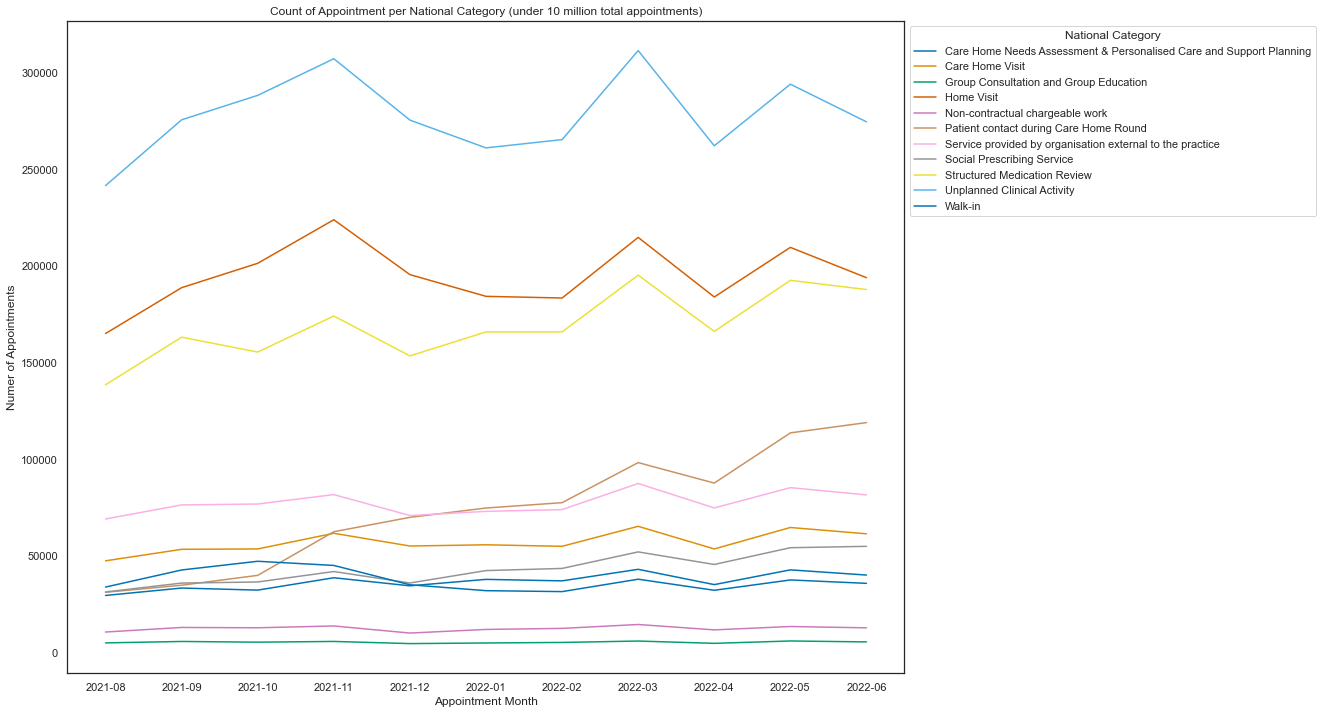

In [1063]:
# Plot the appointments over the available date range, and review the bottom national categories for months.
# Create a lineplot.
bottom_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='national_category', palette='colorblind', data=nc_nc_bottom, ci=None)

# Customise and tidy the plot
bottom_ax.legend(title='National Category', bbox_to_anchor=(1, 1))
bottom_ax.set_xlabel('Appointment Month')
bottom_ax.set_ylabel('Numer of Appointments')
bottom_ax.set_title("Count of Appointment per National Category (under 10 million total appointments)")

plt.savefig('bottom_ax.png')

The main lines to focus on here are the Structured Medication Review and Patient contact during Care Home Round which experience the most significant rise over the analysed period. This runs true with the rise in the Primary Care Round from the service setting graph - suggests insight about NHS staff being able to visit patients might be true. However, it would be worth investigating to see if there has been an increase in number of individuals requiring these services e.g., more people moving to care homes. Could again be a knock-on effect of Covid. 

&ensp;

Overall discussion of trends for the three variables: 

Bar a couple of outliers, there is a general trend which can be examined during the months analysed, which has been highlighted in the analysis above, but follows: 

A sharp rise in appointments from August 2021 to September 2021, which signifies a rise in appointments over Autumn, usually peaking around October or November. Then there seems to be a drop in appointments around December and January and then a levelling out of the appointments over Winter - which is likely due to the impact of Christmas, New Year and holiday period. There then is a rise in appointments at the beginning of Spring creating a second smaller peak in March 2022 before a sharp fall in April 2022. This sharp fall is fairly consistent over the graphs - this is likely due to Easter \ bank holidays but there should be research into what is causing this drop as this can't be inferred from the data. 

Whilst these graphs offer a good insight into the trends that each variable experiences over the months it is difficult to then infer any value from this to the NHS - further impacted by the number of unmapped appointments for each of the variables.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [588]:
# Create a separate data set that can be used in future weeks.
nc_ss_day = nc.groupby(
    ['appointment_date', 'appointment_month', 'service_setting']).sum().reset_index()
# View output.
print(nc_ss_day.shape)
nc_ss_day

(1670, 4)


,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


In [875]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
aug_21 = nc_ss_day[(nc_ss_day['appointment_month'] == '2021-08')]
aug_21

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
150,2021-08-31,2021-08,Extended Access Provision,8281
151,2021-08-31,2021-08,General Practice,1125584
152,2021-08-31,2021-08,Other,23181
153,2021-08-31,2021-08,Primary Care Network,21789


In [876]:
# Check sum of appointments for each service setting
aug_21[(aug_21['appointment_month'] == '2021-08')
       ].groupby(['service_setting']).sum().sort_values(by='count_of_appointments', ascending=False)

,count_of_appointments
service_setting,
General Practice,21575852
Unmapped,1233843
Other,449101
Primary Care Network,432448
Extended Access Provision,160927


In [883]:
# Create a new DataFrame to analyse the other service settings
aug21_ss = aug_21[(aug_21['service_setting'] != 'General Practice')]
aug21_ss.head()

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
5,2021-08-02,2021-08,Extended Access Provision,7705


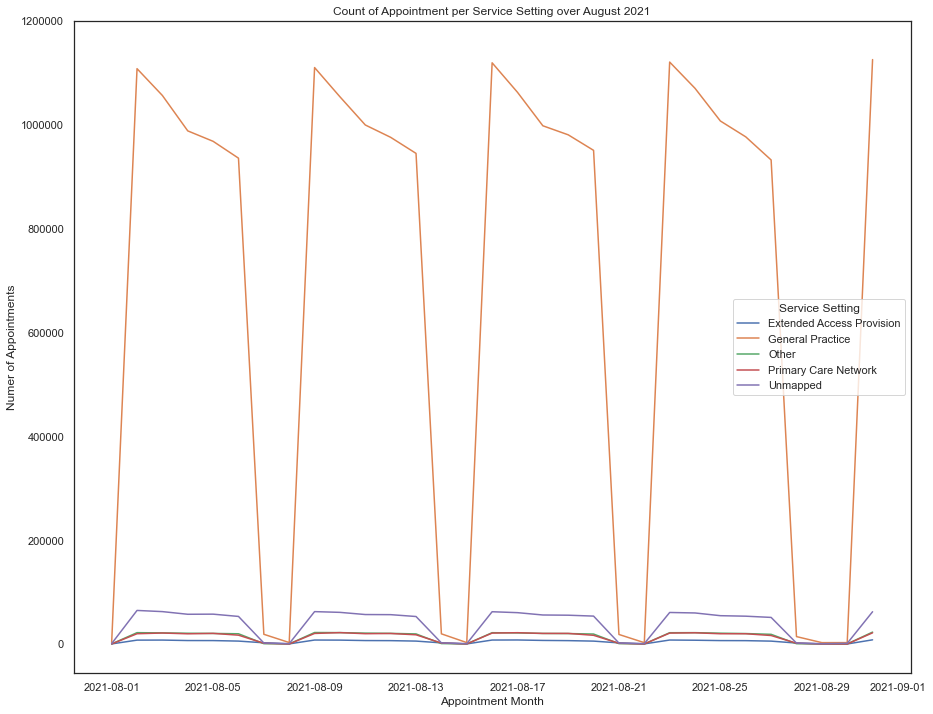

In [1064]:
# Plot the appointments over for August 2021, and review the service setting for this month.
# Create a lineplot.
aug_ax = sns.lineplot(data=aug_21, x='appointment_date',
                      y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
aug_ax.legend(title='Service Setting', loc='center right')
aug_ax.set_xlabel('Appointment Month')
aug_ax.set_ylabel('Numer of Appointments')
aug_ax.set_title("Count of Appointment per Service Setting over August 2021")
aug_ax.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
aug_ax.set_yticks([100000, 300000, 500000, 700000,
                   900000, 1100000], minor=True)
aug_ax.set_yticklabels(['0', '200000', '400000', '600000',
                        '800000', '1000000', '1200000'])

plt.savefig('aug_ax.png')

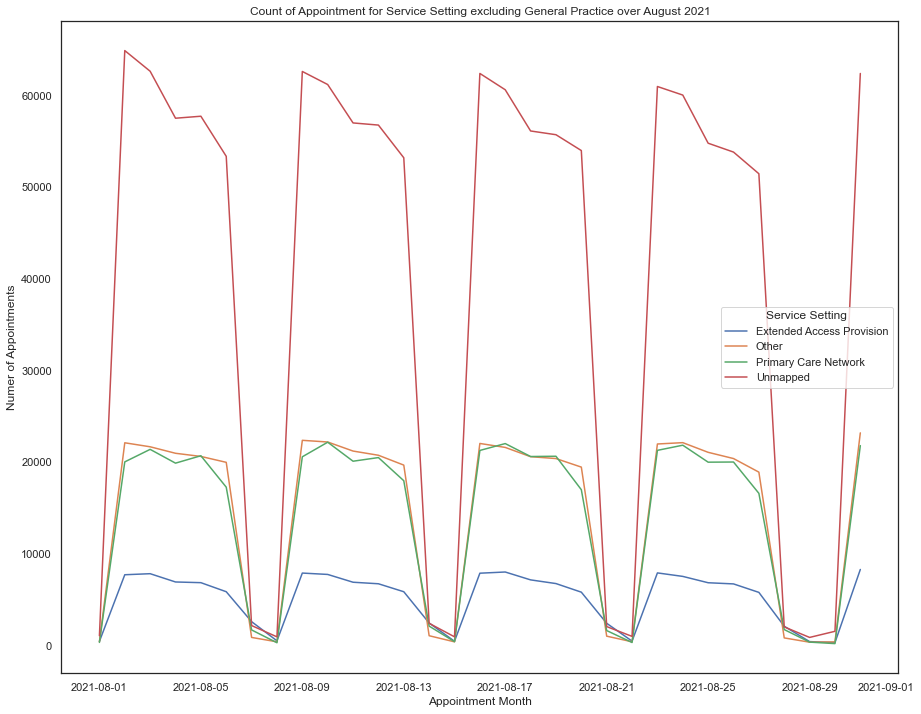

In [1065]:
# Plot the appointments over for August 2021 excluding the General Practice service setting for this month.
# Create a lineplot.
aug_ss_ax = sns.lineplot(data=aug21_ss, x='appointment_date',
             y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
aug_ss_ax.legend(title='Service Setting', loc='center right')
aug_ss_ax.set_xlabel('Appointment Month')
aug_ss_ax.set_ylabel('Numer of Appointments')
aug_ss_ax.set_title("Count of Appointment for Service Setting excluding General Practice over August 2021")

plt.savefig('aug_ss_ax.png')

In [880]:
aug21_ss

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
5,2021-08-02,2021-08,Extended Access Provision,7705
...,...,...,...,...
149,2021-08-30,2021-08,Unmapped,1537
150,2021-08-31,2021-08,Extended Access Provision,8281
152,2021-08-31,2021-08,Other,23181
153,2021-08-31,2021-08,Primary Care Network,21789


In [641]:
plt.savefig('aug_ss_ax.png')

<Figure size 1080x864 with 0 Axes>

**Autumn (October 2021):**

In [78]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
oct_21 = nc_ss_day[(nc_ss_day['appointment_month'] == '2021-10')]
oct_21

,appointment_date,appointment_month,service_setting,count_of_appointments
305,2021-10-01,2021-10,Extended Access Provision,7107
306,2021-10-01,2021-10,General Practice,1130646
307,2021-10-01,2021-10,Other,22639
308,2021-10-01,2021-10,Primary Care Network,22974
309,2021-10-01,2021-10,Unmapped,56201
...,...,...,...,...
455,2021-10-31,2021-10,Extended Access Provision,1113
456,2021-10-31,2021-10,General Practice,17449
457,2021-10-31,2021-10,Other,1147
458,2021-10-31,2021-10,Primary Care Network,1200


In [616]:
# Checked the number of appointments for each Service Setting 
oct_21[(oct_21['appointment_month'] == '2021-10')
       ].groupby(['service_setting']).sum().reset_index().sort_values(by='count_of_appointments', ascending=False)

,service_setting,count_of_appointments
1,General Practice,27606171
4,Unmapped,1366656
3,Primary Care Network,564981
2,Other,556487
0,Extended Access Provision,209539


In [81]:
# Create a DataFrame to exclude General Practice for Oct 21
oct21_ss = oct_21[(oct_21['service_setting'].isin(['Extended Access Provision',
                                                   'Other', 'Primary Care Network', 'Unmapped']))]
oct21_ss.head()

,appointment_date,appointment_month,service_setting,count_of_appointments
305,2021-10-01,2021-10,Extended Access Provision,7107
307,2021-10-01,2021-10,Other,22639
308,2021-10-01,2021-10,Primary Care Network,22974
309,2021-10-01,2021-10,Unmapped,56201
310,2021-10-02,2021-10,Extended Access Provision,7683


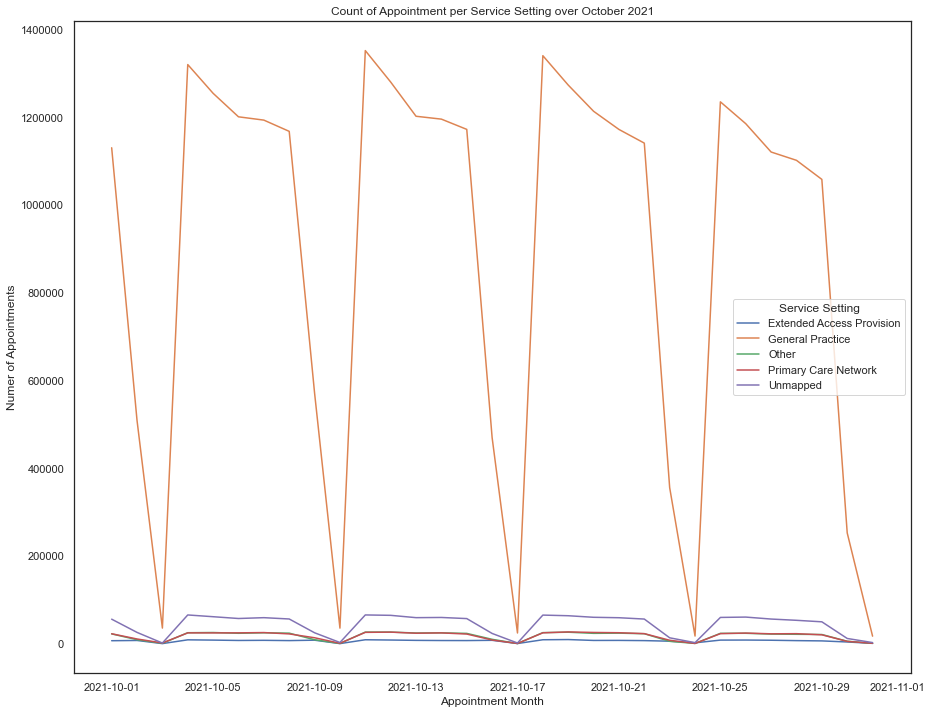

In [1066]:
# Plot the appointments over for Oct 2021, and review the service setting for this month.
# Create a lineplot.
oct_ax = sns.lineplot(data=oct_21, x='appointment_date',
                      y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
oct_ax.legend(title='Service Setting', loc='center right')
oct_ax.set_xlabel('Appointment Month')
oct_ax.set_ylabel('Numer of Appointments')
oct_ax.set_title("Count of Appointment per Service Setting over October 2021")
oct_ax.set_yticks([0, 200000, 400000, 600000,
                  800000, 1000000, 1200000, 1400000])
oct_ax.set_yticks([100000, 300000, 500000, 700000,
                   900000, 1100000, 1300000], minor=True)
oct_ax.set_yticklabels(['0', '200000', '400000', '600000',
                        '800000', '1000000', '1200000', '1400000'])

plt.savefig('oct_ax.png')

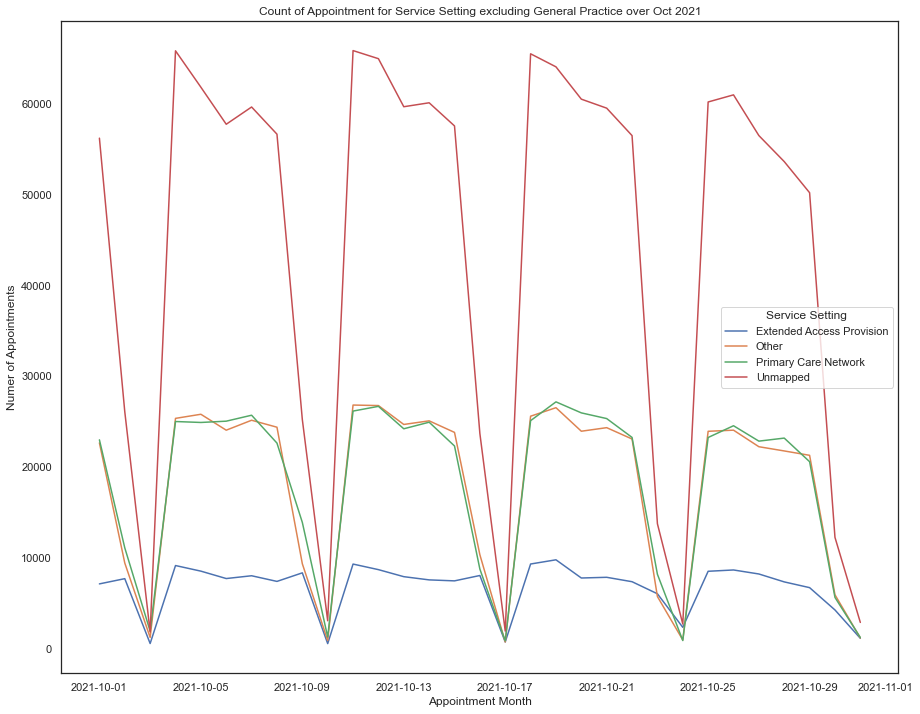

In [1067]:
# Plot the appointments over for October 2021 excluding the General Practice service setting for this month.
# Create a lineplot.
oct_ss_ax = sns.lineplot(data=oct21_ss, x='appointment_date',
                         y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
oct_ss_ax.legend(title='Service Setting', loc='center right')
oct_ss_ax.set_xlabel('Appointment Month')
oct_ss_ax.set_ylabel('Numer of Appointments')
oct_ss_ax.set_title(
    "Count of Appointment for Service Setting excluding General Practice over Oct 2021")

plt.savefig('oct_ss_ax.png')

**Winter (January 2022):**

In [85]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
jan_22 = nc_ss_day[(nc_ss_day['appointment_month'] == '2022-01')]
jan_22

,appointment_date,appointment_month,service_setting,count_of_appointments
765,2022-01-01,2022-01,Extended Access Provision,246
766,2022-01-01,2022-01,General Practice,3578
767,2022-01-01,2022-01,Other,280
768,2022-01-01,2022-01,Primary Care Network,215
769,2022-01-01,2022-01,Unmapped,572
...,...,...,...,...
915,2022-01-31,2022-01,Extended Access Provision,9962
916,2022-01-31,2022-01,General Practice,1305082
917,2022-01-31,2022-01,Other,25034
918,2022-01-31,2022-01,Primary Care Network,30509


In [87]:
# Create a DataFrame to exclude General Practice for Jan 22
jan22_ss = jan_22[(jan_22['service_setting'].isin(['Extended Access Provision',
                                                   'Other', 'Primary Care Network', 'Unmapped']))]
jan22_ss.head()

,appointment_date,appointment_month,service_setting,count_of_appointments
765,2022-01-01,2022-01,Extended Access Provision,246
767,2022-01-01,2022-01,Other,280
768,2022-01-01,2022-01,Primary Care Network,215
769,2022-01-01,2022-01,Unmapped,572
770,2022-01-02,2022-01,Extended Access Provision,403


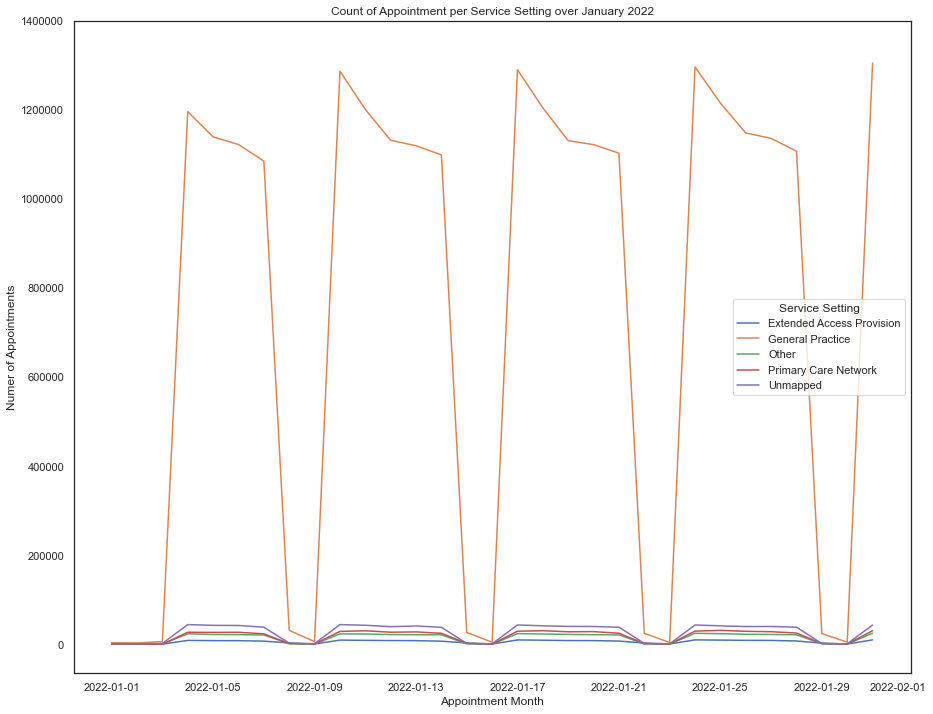

In [1068]:
# Plot the appointments over for Jan 2022, and review the service setting for this month.
# Create a lineplot.
jan_ax = sns.lineplot(data=jan_22, x='appointment_date',
                      y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
jan_ax.legend(title='Service Setting', loc='center right')
jan_ax.set_xlabel('Appointment Month')
jan_ax.set_ylabel('Numer of Appointments')
jan_ax.set_title("Count of Appointment per Service Setting over January 2022")
jan_ax.set_yticks([0, 200000, 400000, 600000,
                  800000, 1000000, 1200000, 1400000])
jan_ax.set_yticks([100000, 300000, 500000, 700000,
                   900000, 1100000, 1300000], minor=True)
jan_ax.set_yticklabels(['0', '200000', '400000', '600000',
                        '800000', '1000000', '1200000', '1400000'])

plt.savefig('jan_ax.png')

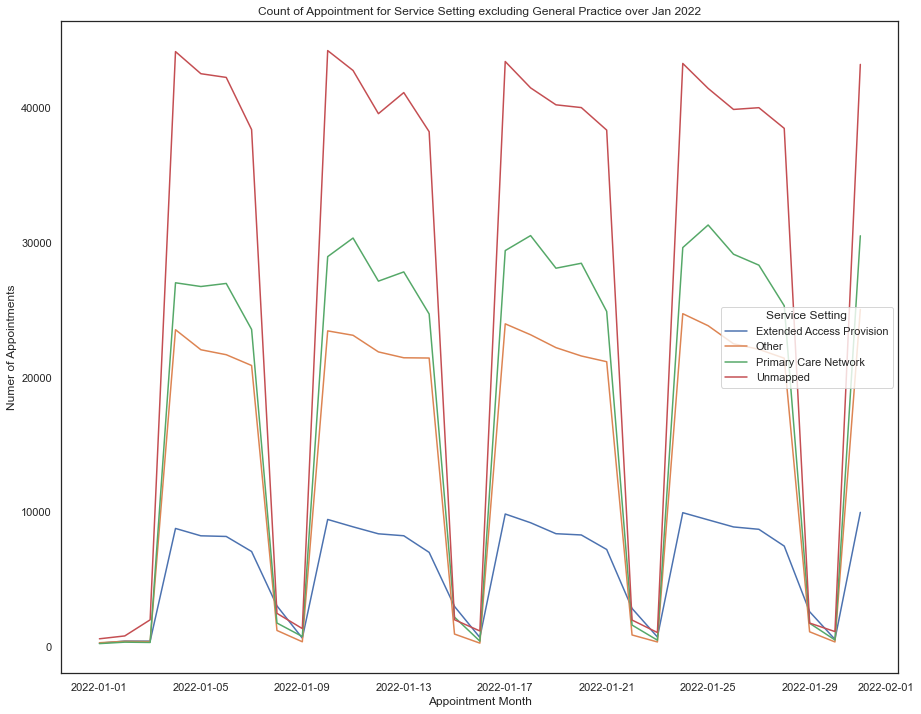

In [1069]:
# Plot the appointments over for January 2022 excluding the General Practice service setting for this month.
# Create a lineplot.
jan_22_ax = sns.lineplot(data=jan22_ss, x='appointment_date',
             y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
jan_22_ax.legend(title='Service Setting', loc='center right')
jan_22_ax.set_xlabel('Appointment Month')
jan_22_ax.set_ylabel('Numer of Appointments')
jan_22_ax.set_title(
    "Count of Appointment for Service Setting excluding General Practice over Jan 2022")

plt.savefig('jan_ss_ax.png')

**Spring (April 2022):**

In [91]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
apr_22 = nc_ss_day[(nc_ss_day['appointment_month'] == '2022-04')]
apr_22

,appointment_date,appointment_month,service_setting,count_of_appointments
1215,2022-04-01,2022-04,Extended Access Provision,8011
1216,2022-04-01,2022-04,General Practice,1085037
1217,2022-04-01,2022-04,Other,21077
1218,2022-04-01,2022-04,Primary Care Network,26493
1219,2022-04-01,2022-04,Unmapped,36836
...,...,...,...,...
1360,2022-04-30,2022-04,Extended Access Provision,3416
1361,2022-04-30,2022-04,General Practice,23675
1362,2022-04-30,2022-04,Other,1148
1363,2022-04-30,2022-04,Primary Care Network,3150


In [93]:
# Create a DataFrame to exclude General Practice for Apr 22
apr22_ss = apr_22[(apr_22['service_setting'].isin(['Extended Access Provision',
                                                   'Other', 'Primary Care Network', 'Unmapped']))]
apr22_ss.head()

,appointment_date,appointment_month,service_setting,count_of_appointments
1215,2022-04-01,2022-04,Extended Access Provision,8011
1217,2022-04-01,2022-04,Other,21077
1218,2022-04-01,2022-04,Primary Care Network,26493
1219,2022-04-01,2022-04,Unmapped,36836
1220,2022-04-02,2022-04,Extended Access Provision,3294


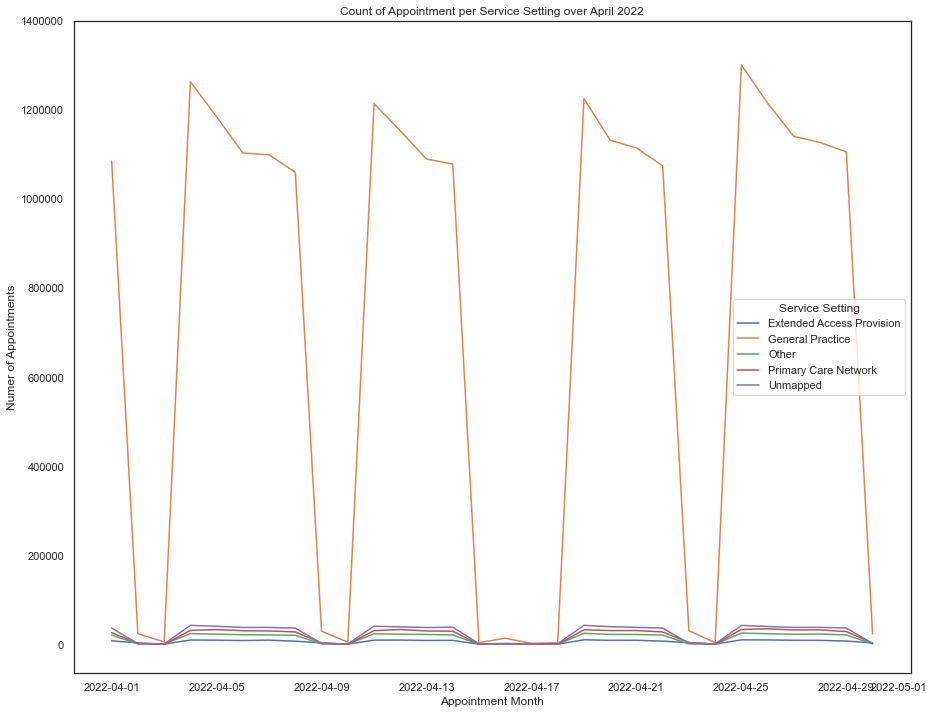

In [1070]:
# Plot the appointments over for Apr 2022, and review the service setting for this month.
# Create a lineplot.
apr_ax = sns.lineplot(data=apr_22, x='appointment_date',
                         y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
apr_ax.legend(title='Service Setting', loc='center right')
apr_ax.set_xlabel('Appointment Month')
apr_ax.set_ylabel('Numer of Appointments')
apr_ax.set_title("Count of Appointment per Service Setting over April 2022")
apr_ax.set_yticks([0, 200000, 400000, 600000,
                      800000, 1000000, 1200000, 1400000])
apr_ax.set_yticks([100000, 300000, 500000, 700000,
                      900000, 1100000, 1300000], minor=True)
apr_ax.set_yticklabels(['0', '200000', '400000', '600000',
                           '800000', '1000000', '1200000', '1400000'])

plt.savefig('apr_ax.png')

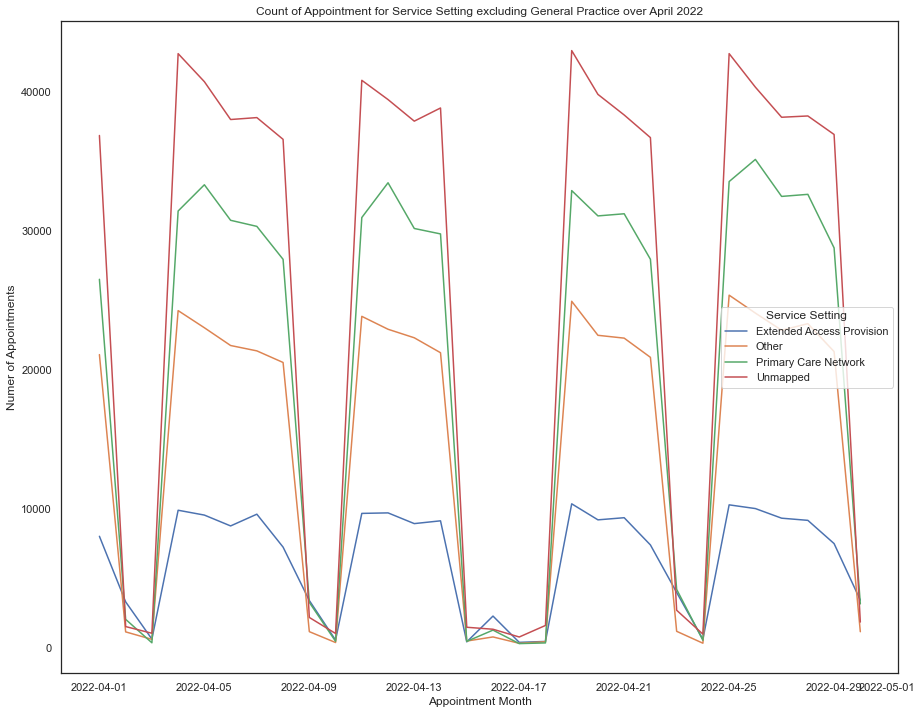

In [1071]:
# Plot the appointments over for January 2022 excluding the General Practice service setting for this month.
# Create a lineplot.
apr_ss_ax = sns.lineplot(data=apr22_ss, x='appointment_date',
             y='count_of_appointments', hue='service_setting', ci=None)

# Customise and tidy the plot
apr_ss_ax.legend(title='Service Setting', loc='center right')
apr_ss_ax.set_xlabel('Appointment Month')
apr_ss_ax.set_ylabel('Numer of Appointments')
apr_ss_ax.set_title(
    "Count of Appointment for Service Setting excluding General Practice over April 2022")

plt.savefig('apr_ss_ax.png')

Analysis / Insights for aug_21, oct_21, jan_22, apr_22:

There is a general trend for each month which features four 'normal distributions' for each service setting which can be put down to the working week (generally four weeks a month). The sharp rise experienced is Monday appointments, where people might have been ill over the weekend and Monday is traditionally seen as the busiest day for GP appointments. 

Then there is a smaller decline over the week from Monday to Friday (some fluctuations over the week but generally a fall from Monday to Friday), which is expected as General Practice and the other service settings get through their appointments over the week. 

There is then a sharp drop in appointments which resembles the start of the weekend where there is a serious reduction in services for Saturday, followed by a smaller decline for Sunday where all services are essentially unavailable. Then the cycle starts again on the Monday.

There is one month to particularly focus on being April 2022.

As mentioned in previous analysis April is a bit of an anomaly in the trend of appointments for not only service settings but also context type and national category. Generally, there was a sharp rise coming out of Winter and a small peak in March 2022 before a sharp drop for April. Focusing on April here we can see that there are a few days where there no appointments recorded - looking at a calendar this is because of April bank holidays either side of the weekend (Dates Good Friday Apr 15 - Apr 18) which is likely the reason for such a drop in appointments. Therefore, the theory regards Easter / bank holidays is likely correct. 

It also has to be noted that for each month Unmapped is the second highest service setting which again hints towards the poor data collection. Though it should be noted that as the months go on the numbers are reducing which is also signified in the service setting graph earlier.

In conclusion these graphs provide very little value to the overall discussion as it is fairly obvious that appointments will be higher during the week and then low on weekends. It also has little relevance to helping the NHS answer its two main questions: Has there been adequate staff and capacity in the networks? What was the actual utilisation of resources? Or identifying causes of miss appointments. 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [133]:
# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [134]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')
# View the DataFrame.
print(tweets.shape)
tweets.head()

(1174, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [135]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [136]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [137]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
tweets.tweet_retweet_count.value_counts()

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

In [138]:
tweets.tweet_favorite_count.value_counts()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

Retweets and favourites are the best metric of how successful tweets are. Replies could also be a good metric but are much harder to record and it would be sensible to just that tweets with a number of replies will also have high retweets & favourites. 

Clearly retweets are used significantly more than favourites. 

It should be noted that the majority of tweets don't have retweets or favourites - the content of these tweets may still be of value. Retweets and favourites are generally interlinked with the number of followers and individual has. Someone with a low follower count could have something important / informative to say which could provide context of poor services or failings of the NHS. So, whilst tweets and favourites are the best metric of successful tweets there might be a loss of valuable information only focusing on these. 

Though I must admit, it would be difficult and time-consuming search twitter reading every tweet related to the NHS. 

In [139]:
# Create a new DataFrame containing only the text.
tweet_text = tweets['tweet_full_text'].reset_index()
# View the DataFrame.
tweet_text
tweet_text

,index,tweet_full_text
0,0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...,...
1169,1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [140]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

For loop helps to seperate the hashtags which can then be passed into a series below which can be filtered to determine the most popular/successful tweets

In [141]:
# Display the first 30 records.
hashtags = pd.Series(tags).value_counts()
hashtags.iloc[:30]

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [142]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(hashtags).reset_index()
data.rename(columns={data.columns[0]: 'word',
            data.columns[1]: 'count'}, inplace=True)
# Rename the columns.
data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


Converted series to a DataFrame to store the hashtags and their count 

In [143]:
# Fix the count datatype.
data['word'] = data['word'].astype('object')
# View the result.
data.dtypes

word     object
count     int64
dtype: object

In [658]:
# Understand the descriptive statistics
data.describe()

,count
count,1754.000000
mean,2.470353
std,17.462844
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,716.000000


In [145]:
# Display records where the count is larger than 10.
data[data['count'] > 10]

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [146]:
data_above_ten = data[data['count'] > 10]
data_above_ten

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


DataFrame filtered to show hashtages with a count higher than 10

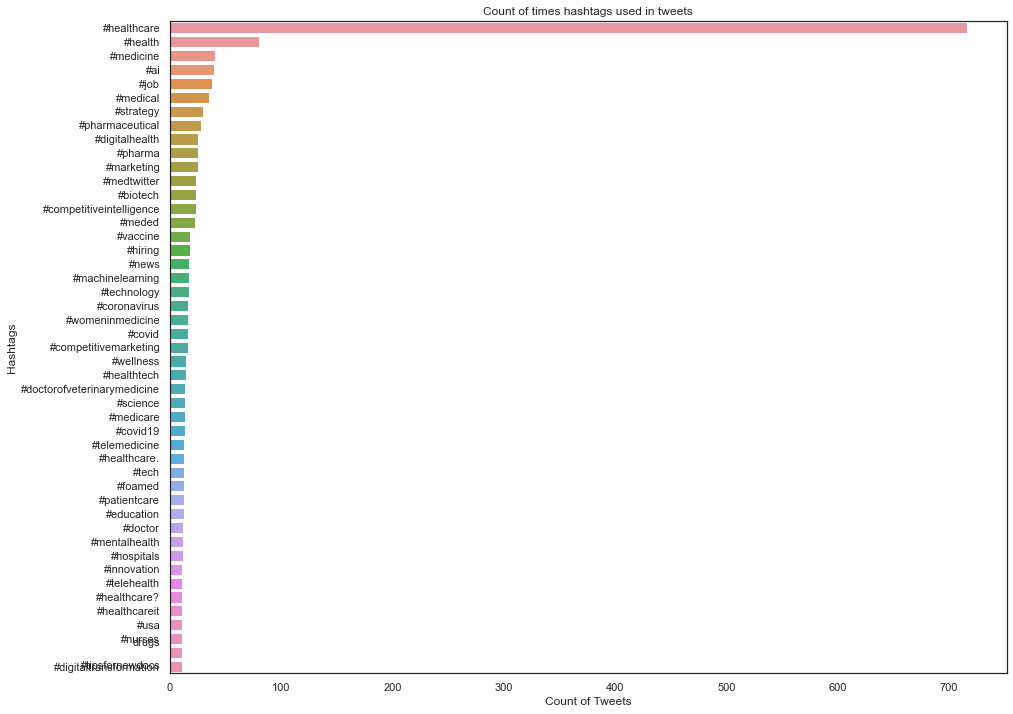

In [1072]:
# Create a Seaborn barplot indicating records with a count >10 records.
hashtag_ax = sns.barplot(
    x='count', y='word', estimator=sum, data=data_above_ten)

# Customise and tidy the plot
hashtag_ax.set_xlabel('Count of Tweets')
hashtag_ax.set_ylabel('Hashtags')
hashtag_ax.set_title(
    "Count of times hashtags used in tweets")

plt.savefig('hashtag_ax.png')

As you could probably predict healthcare, health and medicine are the top hashtags. These are the "parent' hashtags in that they cover the broad scope of the topic which is 'healthcare' the other hashtags could then be classified as 'child' hashtags which are more specific sub sections of the broader topic

Top trending hashtags in this graph are healthcare, health and medicine - however these provide no real insight into the topics trending. Obvious hashtags to be used frequently - goes back to the 'parent' point mentioned above.

Filtering out these parent hashtags will allow us to indentify those of any value.

In [148]:
# The columns you want to search for outliers in.
cols = ['count']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = data_above_ten[cols].quantile(0.25)
Q3 = data_above_ten[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((data_above_ten[cols] < (Q1 - 1.5 * IQR))
              | (data_above_ten[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
data_above_ten_non_outlier = data_above_ten[condition]
data_above_ten_non_outlier.shape

(44, 2)

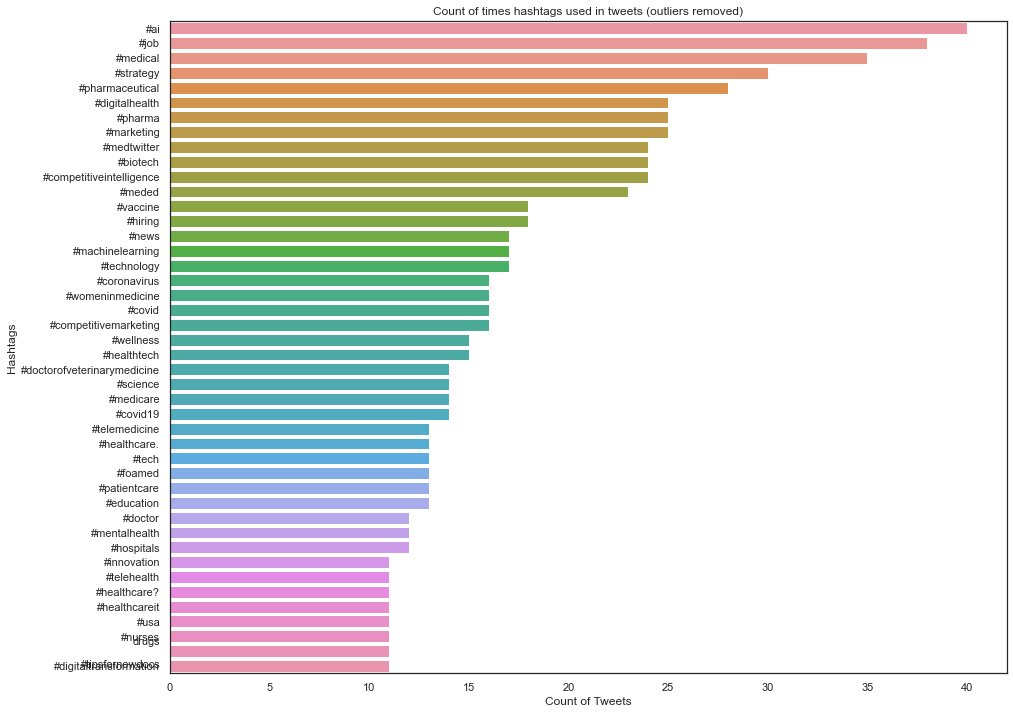

In [1073]:
# Create the plot.
# View the barplot.
non_outlier_ax = sns.barplot(x='count', y='word', estimator=sum,
                             data=data_above_ten_non_outlier)

# Customise and tidy the plot
non_outlier_ax.set_xlabel('Count of Tweets')
non_outlier_ax.set_ylabel('Hashtags')
non_outlier_ax.set_title(
    "Count of times hashtags used in tweets (outliers removed)")

plt.savefig('non_outlier_ax.png')

Removing the outliers from the DataFrame places more emphasis on the 'child' hashtags mentioned earlier. 

Top trending hashtags in this instance are: ai, job, strategy, medical and pharmaceutical - slightly more interesting than the previous ‘parent’ hashtags. The hashtag that is perhaps the most interesting here is strategy as it might relate to tweets that focus on problems with the nhs or improvements that could be made.

Interesting to see that a lot of the hashtags at the top of the second graph are focused on tech in healthcare e.g.: #ai, #digitalhealth, #biotech, #competitiveintelligence. Provides an insight into where the discussion around healthcare is going. 

Without knowing much of the context behind these tweets it is difficult to gain any value from them.

# 

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [150]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [151]:
# Print the min and max dates.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())
print("Dates were scheduled between:",
      (nc['appointment_month'].min()), 'and', (nc['appointment_month'].max()))

2020-01
2022-06
Dates were scheduled between: 2021-08 and 2022-06


ar data collected from a much wider data range - needs to be filtered to be brought in line with the nc dataframe 

In [1017]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_2 = ar[ar['appointment_month'] >= '2021-08']
ar_2

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [714]:
# Create an aggregated data set to review the different features.
ar_agg = ar_2.groupby(['appointment_month', 'hcp_type', 'appointment_status',
                       'appointment_mode', 'time_between_book_and_appointment']).sum().reset_index()

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [803]:
# Determine the total number of appointments per month.
ar_df = ar_agg.groupby(['appointment_month']).sum(
    ['count_of_appointments']).reset_index()
ar_df
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['avg_daily_app'] = (ar_df['count_of_appointments']/30).round(1)
ar_df['utilisation'] = (ar_df['avg_daily_app']/1200000).round(1)
# View the DataFrame

ar_df['utilisation'] = (ar_df['avg_daily_app']/1200000).round(1)
ar_df = ar_df[['appointment_month', 'count_of_appointments',
               'avg_daily_app', 'utilisation']]
ar_df

,appointment_month,count_of_appointments,avg_daily_app,utilisation
0,2021-08,23852171,795072.4,0.7
1,2021-09,28522501,950750.0,0.8
2,2021-10,30303834,1010127.8,0.8
3,2021-11,30405070,1013502.3,0.8
4,2021-12,25140776,838025.9,0.7
5,2022-01,25635474,854515.8,0.7
6,2022-02,25355260,845175.3,0.7
7,2022-03,29595038,986501.3,0.8
8,2022-04,23913060,797102.0,0.7
9,2022-05,27495508,916516.9,0.8


Avergae daily appointments determined by dividing the count of appointments by 30. 

The NHS can accomodate a maximum of 1,200,000 appointments per day so I divided the avg daily appointments by 1,200,000 to determine how many of the services are utilised. 

In [802]:
# Convert the appointment_month to string data type for ease of visualisation.
print(ar_agg.dtypes)
print(ar_df.dtypes)

appointment_month                    object
hcp_type                             object
appointment_status                   object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
appointment_month         object
count_of_appointments      int64
avg_daily_app            float64
utilisation              float64
dtype: object


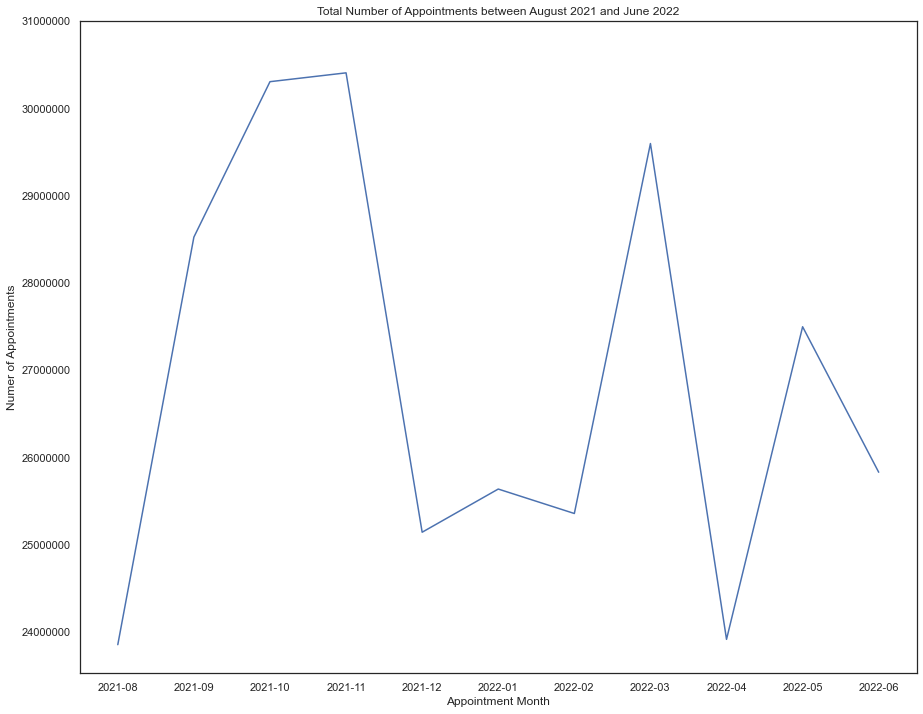

In [1074]:
# Plot sum of count of monthly visits.
# Create a lineplot with Seaborn.
ar_df_ax = sns.lineplot(data=ar_df, x='appointment_month',
                        y='count_of_appointments', ci=None)

# Customise and tidy the plot
ar_df_ax.set_xlabel('Appointment Month')
ar_df_ax.set_ylabel('Numer of Appointments')
ar_df_ax.set_title(
    "Total Number of Appointments between August 2021 and June 2022")
ar_df_ax.set_yticks([24000000, 25000000, 26000000, 27000000, 28000000,
                     29000000, 30000000, 31000000])
ar_df_ax.set_yticklabels(['24000000', '25000000', '26000000', '27000000', '28000000',
                          '29000000', '30000000', '31000000'])

plt.savefig('ar_df_ax.png')

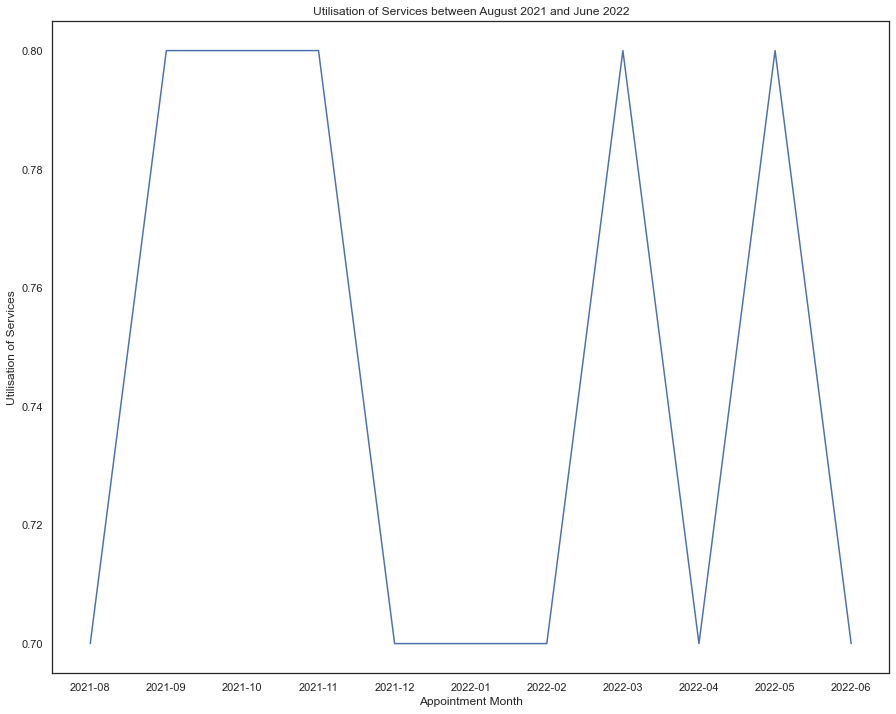

In [1075]:
# Plot monthly capacity utilisation.
# Create a lineplot.
utilisation_ax = sns.lineplot(
    data=ar_df, x='appointment_month', y='utilisation', ci=None)
# Customise and tidy the plot
utilisation_ax.set_xlabel('Appointment Month')
utilisation_ax.set_ylabel('Utilisation of Services')
utilisation_ax.set_title(
    "Utilisation of Services between August 2021 and June 2022")

plt.savefig('utilisation_ax.png')

Utilisation is used here to show how many efficient the NHS services are being used / utilised. Unsurprisingly this follows the pattern of count of appointments:

Services utilised during the autumn and then a fall over the winter months, returning to another rise in March and then that sharp fall in April. 

It is hard to determine what the NHS could do better regarding utilisation of services during the low months. If the fall in appointments are for the reasons, we suspect e.g. holidays etc there is little the NHS can do to counter act this. The NHS could perhaps look at allocating services that are less urgent during this time to free up space for urgent appointments during the busy months. However, how do we determine what is urgent? 

The NHS is already struggling with long waiting times. The median waiting time is currently 13 weeks for hundreds of thousands of patients waiting over 52 weeks. https://nhswaitlist.lcp.uk.com/  Could be looked at from two angles? Is there the possibility to move someone’s appointment forward if there is space during the quieter months? However, it would be unfair to put someone’s appointment back to a quiet month if they’ve been waiting a while. 

The limitation of this graph is that it doesn’t show the utilisation of services. They have been grouped all together. Therefore, I would suggest further investigation into the utilisation of each service. Could be that during the quiet months General Practice appointments are utilised (though unlikely knowing the trends) whilst Primary care is underutilised – would provide more context. 

It is almost impossible to determine anything regarding staffing levels because we don't have any staffing data - no way you could make any solid case on staffing numbers without this information. 

**Question 2:** How do the healthcare professional types differ over time?

In [910]:
ar_type = ar_agg.groupby(['appointment_month', 'hcp_type']).sum().reset_index()
ar_type.head()

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022
1,2021-08,Other Practice staff,10797821
2,2021-08,Unknown,755328
3,2021-09,GP,14487785
4,2021-09,Other Practice staff,13126731


Created a new DataFrame to total appointments per hcp type for each month. The reason for this was when plotting a lineplot straight from the ar_agg dataframe the y-axis values were off

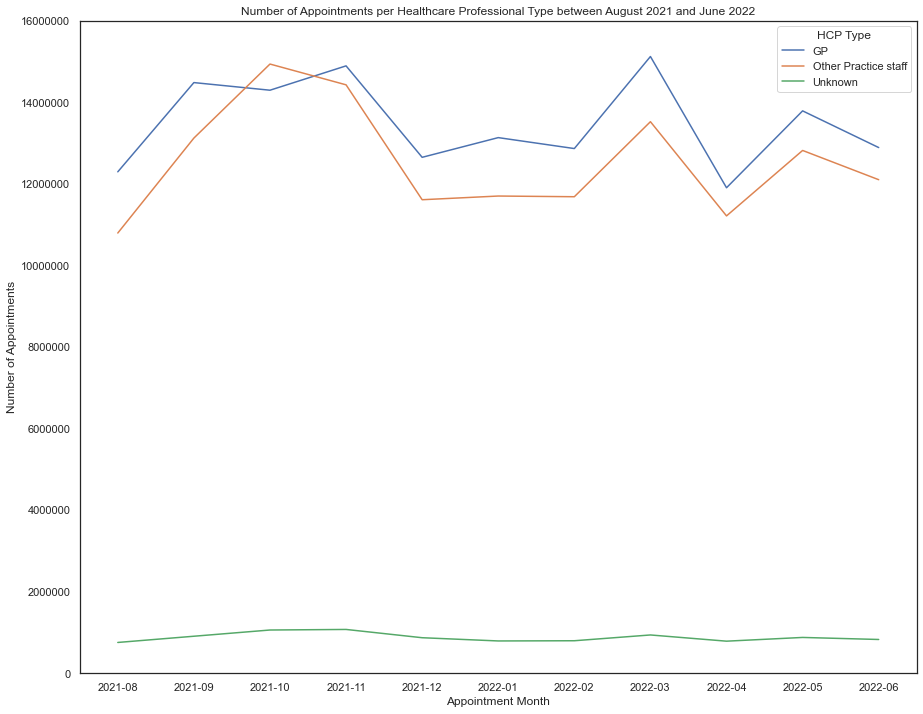

In [1076]:
# Plot a lineplot to show how the heatlhcare professionals types differ over time
ar_type_ax = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_type, ci=None)

# Customise and tidy the plot
ar_type_ax.legend(title='HCP Type', loc='upper right')
ar_type_ax.set_xlabel('Appointment Month')
ar_type_ax.set_ylabel('Number of Appointments')
ar_type_ax.set_title(
    "Number of Appointments per Healthcare Professional Type between August 2021 and June 2022")
ar_type_ax.set_yticks([0, 2000000, 4000000, 6000000,
                      8000000, 10000000, 12000000, 14000000, 16000000])
ar_type_ax.set_yticks([1000000, 3000000, 5000000, 7000000,
                      9000000, 11000000, 13000000, 15000000], minor=True)
ar_type_ax.set_yticklabels(['0', '2000000', '4000000', '6000000',
                           '8000000', '10000000', '12000000', '14000000', '16000000'])

plt.savefig('type_ax.png')

Interesting that in October 2021 Other Practice Staff exceeds General Practice for appointments - this is the only time this happens. What caused this significant rise in appointments? 

However, when looking at the metadata: hcp_type has been recorded ineffectively. 
Metadata: 

"Healthcare professional type (HCP type) was incorrectly extracted for some practices from  October 2017 onwards. This has led to potential incorrect reporting of some HCP Types,  including nurses. The only HCP type currently collected with high enough consistency for  publication is GP. Therefore, all other HCP types are reported as 'Other Practice Staff' throughout this release."

Therefore, it is difficult to provide any context to these numbers at all - this really is a shortcoming of the data that there is such poor data collection.

**Question 3:** Are there significant changes in whether or not visits are attended?

In [911]:
ar_status = ar_agg.groupby(['appointment_month', 'appointment_status']).sum().reset_index()
ar_status.head()

,appointment_month,appointment_status,count_of_appointments
0,2021-08,Attended,22081765
1,2021-08,DNA,949137
2,2021-08,Unknown,821269
3,2021-09,Attended,25757066
4,2021-09,DNA,1321348


Created a new DataFrame to total appointments per appointment status for each month. The reason for this was when plotting a lineplot straight from the ar_agg dataframe the y-axis values were off

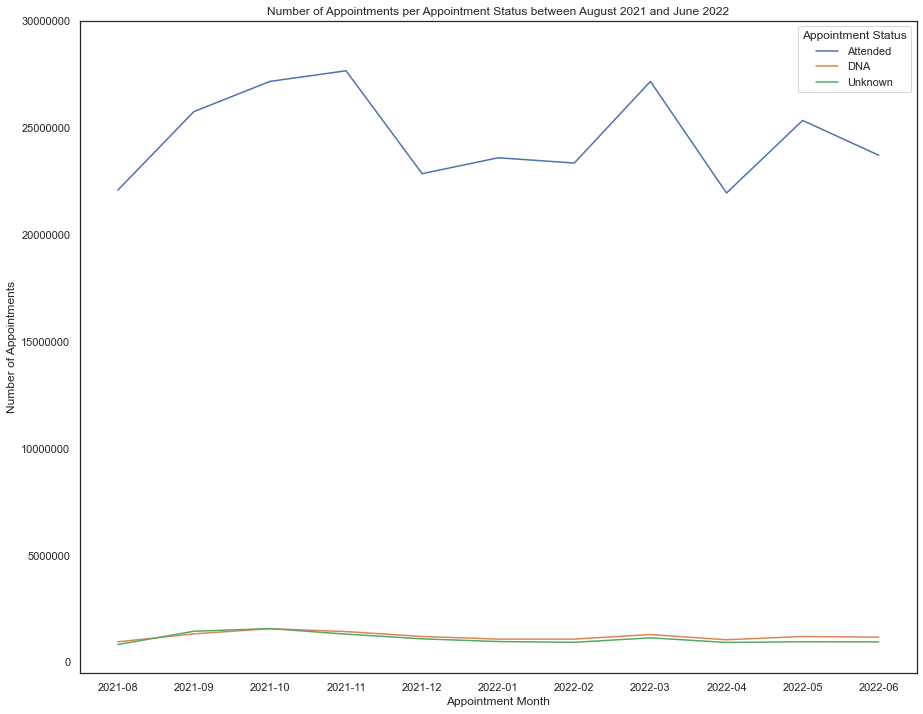

In [1077]:
ar_status_ax = sns.lineplot(data=ar_status, x='appointment_month',
                         y='count_of_appointments', hue='appointment_status', ci=None)

ar_status_ax.legend(title='Appointment Status', loc='upper right')
ar_status_ax.set_xlabel('Appointment Month')
ar_status_ax.set_ylabel('Number of Appointments')
ar_status_ax.set_title(
    "Number of Appointments per Appointment Status between August 2021 and June 2022")

ar_status_ax.set_yticks([0, 5000000, 10000000, 15000000,
                      20000000, 25000000, 30000000])
ar_status_ax.set_yticks([2500000, 7500000, 12500000, 17500000,
                      22500000, 25000000, 27500000], minor=True)
ar_status_ax.set_yticklabels(['0', '5000000', '10000000', '15000000',
                           '20000000', '25000000', '30000000'])

plt.savefig('ar_agg_ax.png')

Analysis of all appointment modes including attended is below, following the second lineplot

In [855]:
# Create a new DataFrame to remove attended - focus on DNA and Unknown
ex_attend = ar_agg[ar_agg['appointment_status'] != 'Attended']
ex_attend.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
40,2021-08,GP,DNA,Face-to-Face,1 Day,16314
41,2021-08,GP,DNA,Face-to-Face,15 to 21 Days,12960
42,2021-08,GP,DNA,Face-to-Face,2 to 7 Days,43754
43,2021-08,GP,DNA,Face-to-Face,22 to 28 Days,7457
44,2021-08,GP,DNA,Face-to-Face,8 to 14 Days,24346


Created a new DataFrame to exclude attended to focus on the other appointment status types

In [929]:
# Filter the ex_attend futher
# Create a new DataFrame to group by month and status
ex_att_group = ex_attend.groupby(['appointment_month', 'appointment_status'])\
.sum('count_of_appointments').reset_index()
ex_att_group.head()

,appointment_month,appointment_status,count_of_appointments
0,2021-08,DNA,949137
1,2021-08,Unknown,821269
2,2021-09,DNA,1321348
3,2021-09,Unknown,1444087
4,2021-10,DNA,1565624


Created a new DataFrame to total appointments per appointment status for each month (excluding Attended). This was done to ensure the y-axis values were correct.

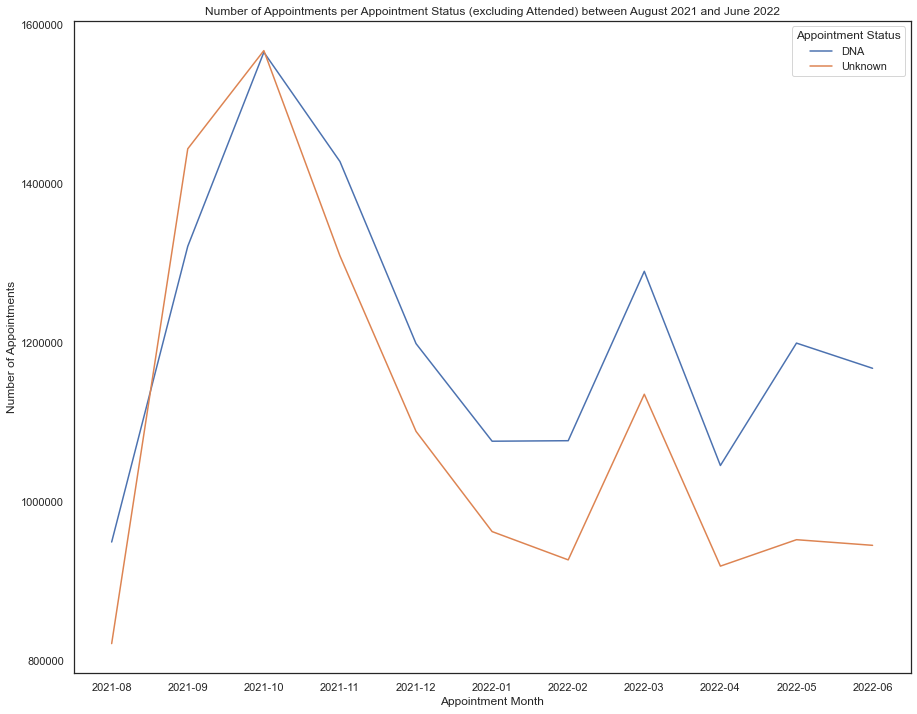

In [1078]:
# Create a line plot to focus on DNA and Unknown the question.
ex_att_ax = sns.lineplot(data=ex_att_group, x='appointment_month',
                            y='count_of_appointments', hue='appointment_status', ci=None)

ex_att_ax.legend(title='Appointment Status', loc='upper right')
ex_att_ax.set_xlabel('Appointment Month')
ex_att_ax.set_ylabel('Number of Appointments')
ex_att_ax.set_title(
    "Number of Appointments per Appointment Status (excluding Attended) between August 2021 and June 2022")

ex_att_ax.set_yticks([800000, 1000000, 1200000, 1400000, 1600000])
ex_att_ax.set_yticks([900000, 1100000, 1300000, 1500000], minor=True)
ex_att_ax.set_yticklabels(['800000', '1000000', '1200000',
                           '1400000', '1600000'])

plt.savefig('ex_attend_ax.png')

Attended appointment statuses essentially follow this pattern we have seen with count of appointments over the months analysed. The more the appointments are booked the more you will see attended, with falls in winter where there are less appointments.   

Looking at the ex_att_ax plot - This also follows the pattern for count of appointments we have seen. Perhaps unsurprising that the more appointments there are the more that will not be unattended. 

During these months all of service settings, besides unmapped, followed the same pattern in terms of number of appointments. Therefore, hard to determine if one service setting is responsible for unattendances.

Without comparing to any other variable these lines provide us with little information. 

**Question 4:** Are there changes in terms of appointment mode and the busiest months?

In [938]:
# Create a df to group by month and mode
ar_mode = ar_agg.groupby(['appointment_month', 'appointment_mode']).sum().reset_index()
ar_mode.head()

,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Face-to-Face,13717325
1,2021-08,Home Visit,151619
2,2021-08,Telephone,9149072
3,2021-08,Unknown,724126
4,2021-08,Video/Online,110029


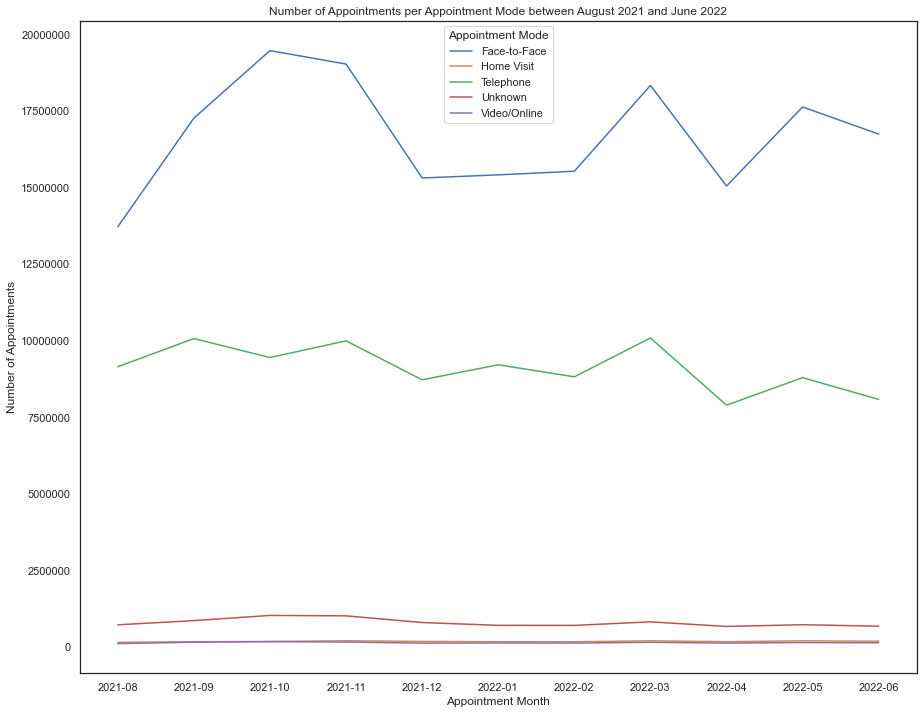

In [1079]:
# Create a line plot to answer the question.
ar_mode_ax = sns.lineplot(data=ar_mode, x='appointment_month',
                          y='count_of_appointments', hue='appointment_mode', ci=None)

ar_mode_ax.legend(title='Appointment Mode')
ar_mode_ax.set_xlabel('Appointment Month')
ar_mode_ax.set_ylabel('Number of Appointments')
ar_mode_ax.set_title(
    "Number of Appointments per Appointment Mode between August 2021 and June 2022")

ar_mode_ax.set_yticks([0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000,
                      17500000, 20000000])
ar_mode_ax.set_yticklabels(['0', '2500000', '5000000', '7500000',
                           '10000000', '12500000', '15000000', '17500000', '20000000'])

plt.savefig('ar_mode_ax.png')

Analysis and insights are underneath the second filtered lineplot below.

In [930]:
# Remove face to face and telephone modes to visualise other appointment modes
ex_face = ar_agg[ar_agg['appointment_mode'].isin(['Home Visit', 'Unknown', 'Video/Online'])]
ex_face.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
8,2021-08,GP,Attended,Home Visit,1 Day,6690
9,2021-08,GP,Attended,Home Visit,15 to 21 Days,387
10,2021-08,GP,Attended,Home Visit,2 to 7 Days,7012
11,2021-08,GP,Attended,Home Visit,22 to 28 Days,215
12,2021-08,GP,Attended,Home Visit,8 to 14 Days,1060


In [932]:
# Filter the ex_attend futher
# Create a new DataFrame to group by month and mode
ex_face_group = ex_face.groupby(['appointment_month', 'appointment_mode'])\
.sum('count_of_appointments').reset_index()
ex_face_group.head()

,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Home Visit,151619
1,2021-08,Unknown,724126
2,2021-08,Video/Online,110029
3,2021-09,Home Visit,171829
4,2021-09,Unknown,859946


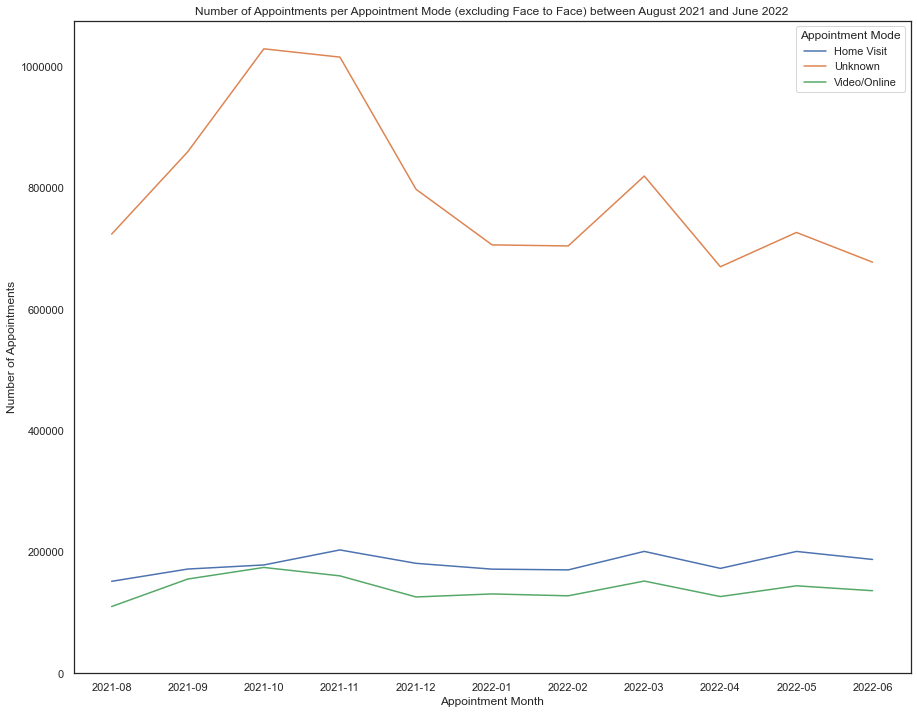

In [1080]:
# Create a line plot to answer the question.
ex_face_ax = sns.lineplot(data=ex_face_group, x='appointment_month',
                          y='count_of_appointments', hue='appointment_mode', ci=None)

ex_face_ax.legend(title='Appointment Mode')
ex_face_ax.set_xlabel('Appointment Month')
ex_face_ax.set_ylabel('Number of Appointments')
ex_face_ax.set_title(
    "Number of Appointments per Appointment Mode (excluding Face to Face) between August 2021 and June 2022")

ex_face_ax.set_yticks([0, 200000, 400000, 600000, 800000, 1000000])
ex_face_ax.set_yticks([100000, 300000, 500000, 700000, 900000], minor=True)
ex_face_ax.set_yticklabels(['0', '200000', '400000', '600000',
                           '800000', '1000000'])

plt.savefig('ex_face_ax.png')

Are there changes in terms of appointment type and the busiest months?

Face to Face follows the same pattern as General Practice appointments - therefore during the busiest months for General Practice, Face to Face appointments also increases.

Telephone calls also sees an increase in the busier months of November 2021 and March 2022, however, sees a drop in the second busiest month of October 2021 - in this month the Face-to-Face appointment mode sees its highest number of appointments. Face to face seems to have taken some of the Telephone calls - Covid cases increased during this time due to the Omicron strain so more people may have been going for check-ups / tests - not feeling well. However, the guidance at the time was to stay at home and test - might have thought this would have decreased face to face appointments. Is this a human error problem where what we think should be happening doesn't always as humans are unpredictable. 

Again, it needs to be highlighted that unknown also experiences in the number of appointments during the busiest months - this suggest there is poor logistics in collecting data at practices where data is being recorded.

**Question 5:** Are there any trends in time between booking an appointment?

In [937]:
# Create a df to group by month and time between book and appointment 
ar_time = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment']).sum().reset_index()
ar_time.head(10)

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2021-08,1 Day,2018319
1,2021-08,15 to 21 Days,1453209
2,2021-08,2 to 7 Days,4924960
3,2021-08,22 to 28 Days,828866
4,2021-08,8 to 14 Days,2889150
5,2021-08,More than 28 Days,673225
6,2021-08,Same Day,11051004
7,2021-08,Unknown / Data Quality,13438
8,2021-09,1 Day,2666072
9,2021-09,15 to 21 Days,1869263


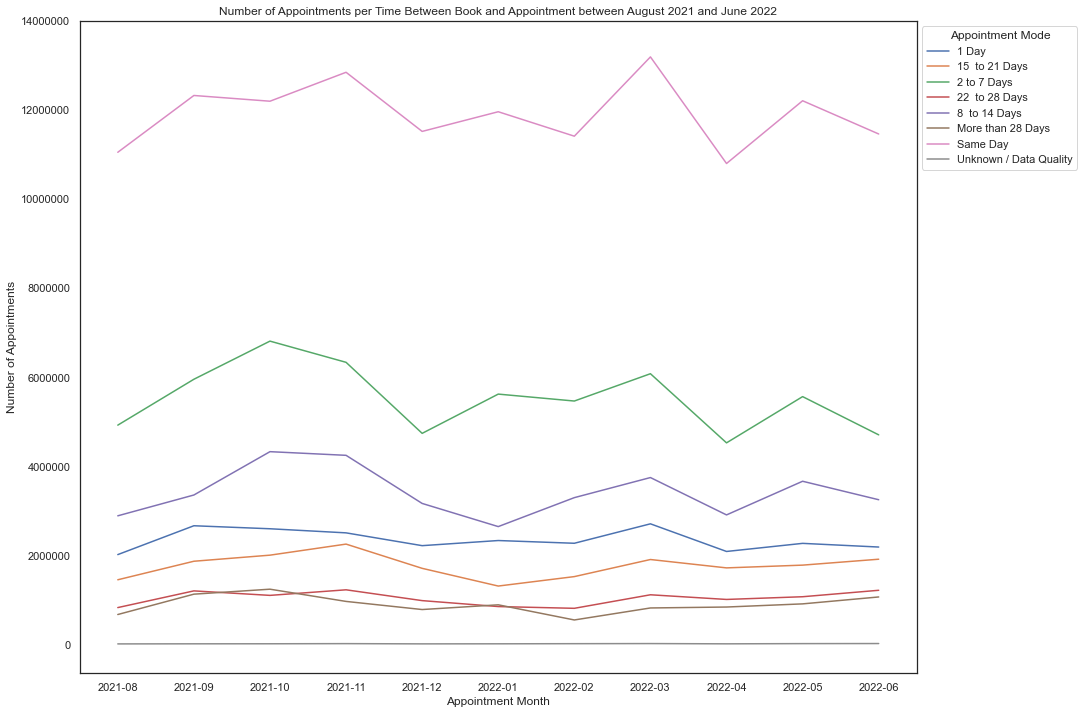

In [1081]:
# Create a line plot to answer the question.
ar_time_ax = sns.lineplot(data=ar_time, x='appointment_month', y='count_of_appointments',
                          hue='time_between_book_and_appointment', ci=None)

ar_time_ax.legend(title='Appointment Mode', bbox_to_anchor=(1, 1))
ar_time_ax.set_xlabel('Appointment Month')
ar_time_ax.set_ylabel('Number of Appointments')
ar_time_ax.set_title(
    "Number of Appointments per Time Between Book and Appointment between August 2021 and June 2022")
ar_time_ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000,])
ar_time_ax.set_yticks([1000000, 3000000, 5000000, 7000000, 9000000, 11000000], minor=True)
ar_time_ax.set_yticklabels(['0', '2000000', '4000000', '6000000', '8000000', '10000000', '12000000', '14000000'])

plt.savefig('ar_time_ax.png')

Are there any trends in time between booking an appointment?

The longer time between booking and appointment will signify more specialised services and therefore likely to see less appointments. 

Significant difference between the same day appointments and the other appointment modes - this runs true with the patterns we have seen for General Practice and Face to Face meetings. Most General Practice appointments are seen on the same day and face to face. 

2 to 7 days also accounts for a higher number of appointments - likely to be return appointments or new appointments following an initial General Practice appointment. 

Note: 2 to 7 days and 8 to 14 days experience increase in appointments at the same time there are increases in DNA (Did not attend) - Further analysis in this is below. 

Should be noted here that it is good to see a low and flat line for Unknown / Data Quality - excellent data collection on the appointment mode. Begs the question, how can appointment mode be record so effectively but so poorly elsewhere.

# Extra Analysis

In [806]:
# Create a new to isolate the DNA appointment status 
dna = ar_agg[ar_agg['appointment_status']=='DNA']

# View the DataFrame
dna.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
40,2021-08,GP,DNA,Face-to-Face,1 Day,16314
41,2021-08,GP,DNA,Face-to-Face,15 to 21 Days,12960
42,2021-08,GP,DNA,Face-to-Face,2 to 7 Days,43754
43,2021-08,GP,DNA,Face-to-Face,22 to 28 Days,7457
44,2021-08,GP,DNA,Face-to-Face,8 to 14 Days,24346


In [946]:
# Create a DataFrame to group the values for DNA
dna_group = dna.groupby(['appointment_month']).sum().reset_index()
dna_group

,appointment_month,count_of_appointments
0,2021-08,949137
1,2021-09,1321348
2,2021-10,1565624
3,2021-11,1428087
4,2021-12,1198866
5,2022-01,1076013
6,2022-02,1076658
7,2022-03,1289888
8,2022-04,1045455
9,2022-05,1199518


I wanted to isolate the the DNA attend appointment status: if the issues with the NHS is around the cost of unattended appointments then this is the appointment mode I need to focus on

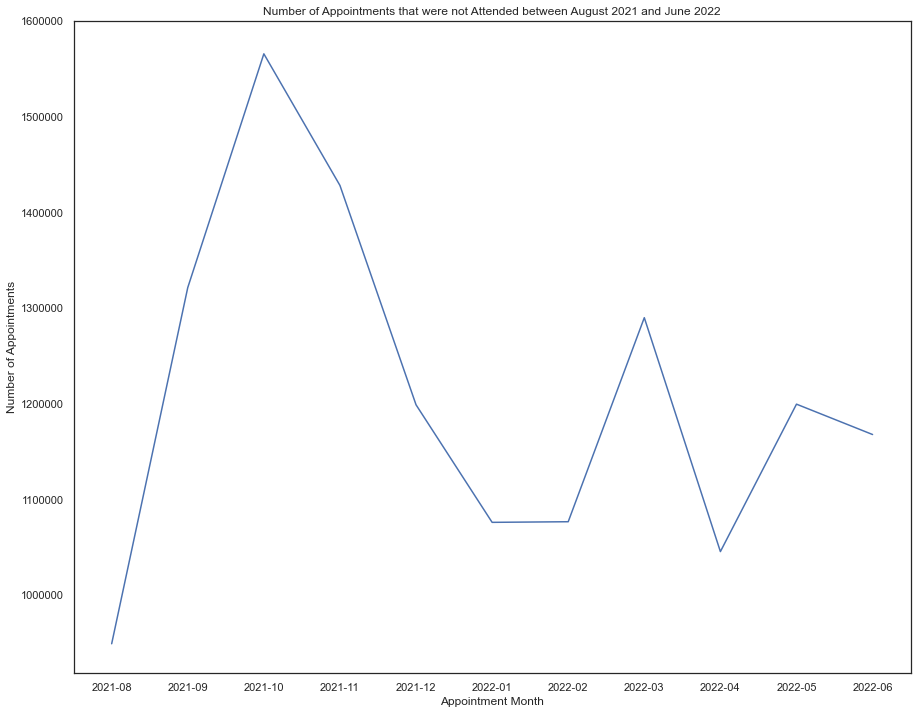

In [1082]:
# Create a line plot to show number of DNA appointments.
dna_ax = sns.lineplot(x='appointment_month', y='count_of_appointments', data=dna_group, ci=None)

dna_ax.set_xlabel('Appointment Month')
dna_ax.set_ylabel('Number of Appointments')
dna_ax.set_title(
    "Number of Appointments that were not Attended between August 2021 and June 2022")

dna_ax.set_yticks([1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000])
dna_ax.set_yticklabels(['1000000', '1100000', '1200000', '1300000', '1400000', '1500000', '1600000'])

plt.savefig('dna_ax.png')

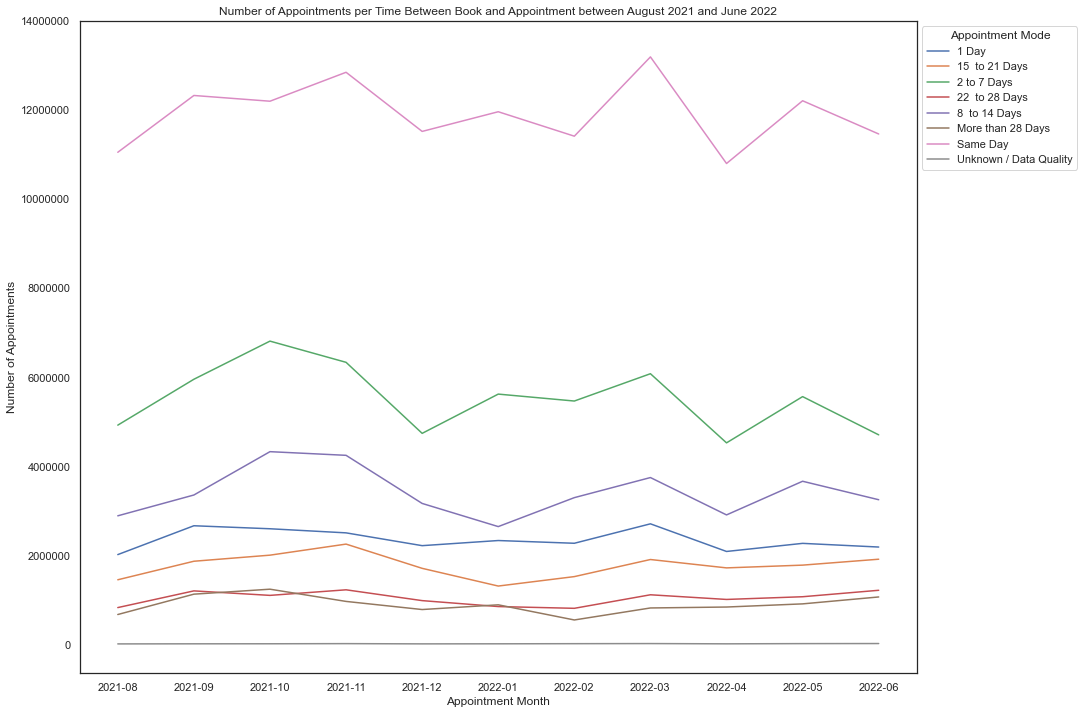

In [1095]:
# Reproduce line plot to continue the narrative.
ar_time_ax = sns.lineplot(data=ar_time, x='appointment_month', y='count_of_appointments',
                          hue='time_between_book_and_appointment', ci=None)

ar_time_ax.legend(title='Appointment Mode', bbox_to_anchor=(1, 1))
ar_time_ax.set_xlabel('Appointment Month')
ar_time_ax.set_ylabel('Number of Appointments')
ar_time_ax.set_title(
    "Number of Appointments per Time Between Book and Appointment between August 2021 and June 2022")
ar_time_ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000,])
ar_time_ax.set_yticks([1000000, 3000000, 5000000, 7000000, 9000000, 11000000], minor=True)
ar_time_ax.set_yticklabels(['0', '2000000', '4000000', '6000000', '8000000', '10000000', '12000000', '14000000'])

plt.savefig('ar_time_ax.png')

Reproduced the graph above to focus on the appointment mode: 

As stated above the 2 to 7 days and 8 to 14 days both experience peaks and troughs at the same time when appointments were not attended. 

Therefore, the next steps I took was to look at dna but filtered through each time between book and appointment. 

In [1006]:
# Create a new DataFrame to focus on DNA and time_between_book_and_appointment
dna_time = dna.groupby(['appointment_month', 'time_between_book_and_appointment',\
                          'appointment_status']).sum().reset_index()

# View output
dna_time.head(10)

,appointment_month,time_between_book_and_appointment,appointment_status,count_of_appointments
0,2021-08,1 Day,DNA,73344
1,2021-08,15 to 21 Days,DNA,106029
2,2021-08,2 to 7 Days,DNA,262379
3,2021-08,22 to 28 Days,DNA,63035
4,2021-08,8 to 14 Days,DNA,199376
5,2021-08,More than 28 Days,DNA,60104
6,2021-08,Same Day,DNA,184423
7,2021-08,Unknown / Data Quality,DNA,447
8,2021-09,1 Day,DNA,112116
9,2021-09,15 to 21 Days,DNA,155318


Subsetted the DNA DataFrame to just focus on the time between book and appointment so that I could then plot an lineplot to visualise the trends over the months studied. Lineplot and insights below.

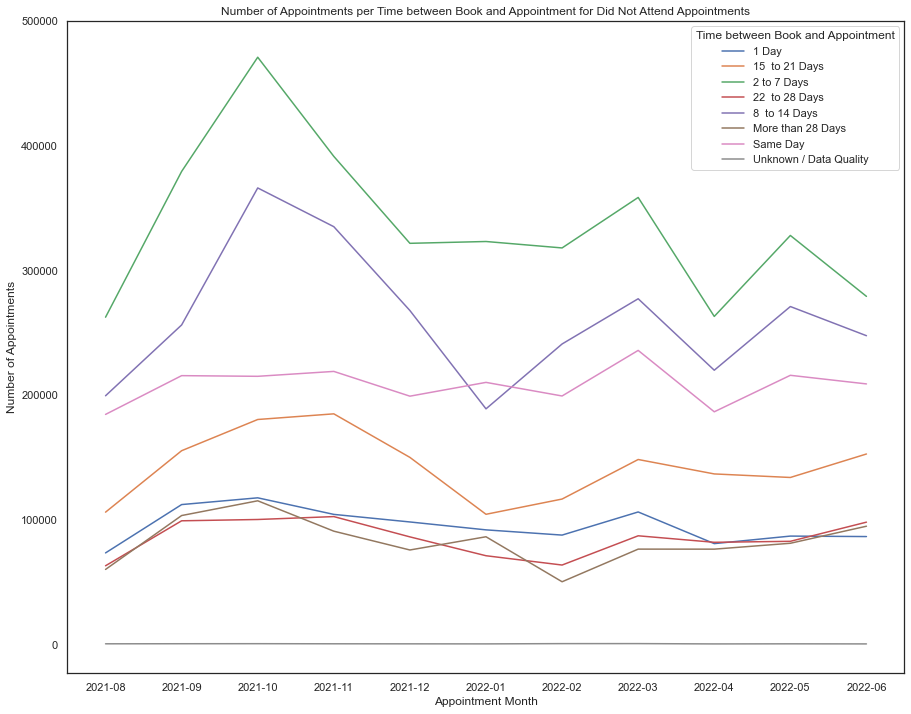

In [1084]:
dna_time_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='time_between_book_and_appointment', data=dna_time, ci=None)

# Customise and tidy the graph
dna_time_ax.legend(title='Time between Book and Appointment', loc='upper right')
dna_time_ax.set_xlabel('Appointment Month')
dna_time_ax.set_ylabel('Number of Appointments')
dna_time_ax.set_title(
    "Number of Appointments per Time between Book and Appointment for Did Not Attend Appointments")
dna_time_ax.set_yticks([0, 100000, 200000, 300000, 400000, 500000])
dna_time_ax.set_yticks([50000, 150000, 250000, 350000,
                        450000], minor=True)
dna_time_ax.set_yticklabels(['0', '100000', '200000', '300000',
                             '400000', '500000'])

plt.savefig('dna_time_ax.png')

Looking at the lineplot we can see that appointments with a time between book and appointment of '2 to 7 Days' and '8 to 14 Days' stand out as those that contribute to significantly towards the number of appointments unattended. Particularly 2 to 7 Days, which is worrying as these appointments ranked second for the number of appointments. 

Why is this the case? It might be that if you are feeling ill and go to book an appointment but can't get one on the same day or 1 day after (which both rank among the lowest for unattended appointments), then you book for later in the week. However, after couple of days the ill feeling passes and you begin to feel better and no longer need the appointment - rather than cancelling the appointment, these people just forget and don't follow it up - the human error problem again? Though these are likley to be GP appointments so identifying the hcp_type would be important here.

I wanted to examine these two time between book and appointments further and so created two subsets to focus on these variables, this analysis might help determine why these contribute to more unattended appointments than other 'time between book and appointment'.

In [808]:
# Create a new subset on the 8 to 14 Days time between book and appointment
eight_fourteen = ar_agg[ar_agg['time_between_book_and_appointment']
                         == '8  to 14 Days']

# View the output
eight_fourteen.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
12,2021-08,GP,Attended,Home Visit,8 to 14 Days,1060
20,2021-08,GP,Attended,Telephone,8 to 14 Days,488939
28,2021-08,GP,Attended,Unknown,8 to 14 Days,7736
36,2021-08,GP,Attended,Video/Online,8 to 14 Days,3561


Subset of ar_agg dataframe to focus on the 8 to 14 Days time between book and appointment 

In [761]:
# From the new output - groupby hcp_type for 8 to 14 Days time between book and appointment
type_8_14 = eight_fourteen.groupby(['appointment_month', 'hcp_type']).sum().reset_index()

# View the output
type_8_14.head()

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,975628
1,2021-08,Other Practice staff,1867275
2,2021-08,Unknown,46247
3,2021-09,GP,1253666
4,2021-09,Other Practice staff,2044882


filtered the data further to focus on the healthcare professional type 

In [810]:
# Create a new subset on the 2 to 7 Days time between book and appointment 
two_seven = ar_agg[ar_agg['time_between_book_and_appointment']
                    == '2 to 7 Days']

# View the output
two_seven

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
10,2021-08,GP,Attended,Home Visit,2 to 7 Days,7012
18,2021-08,GP,Attended,Telephone,2 to 7 Days,975156
26,2021-08,GP,Attended,Unknown,2 to 7 Days,20961
34,2021-08,GP,Attended,Video/Online,2 to 7 Days,13169
...,...,...,...,...,...,...
3723,2022-06,Unknown,Unknown,Face-to-Face,2 to 7 Days,3146
3731,2022-06,Unknown,Unknown,Home Visit,2 to 7 Days,984
3739,2022-06,Unknown,Unknown,Telephone,2 to 7 Days,1000
3747,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,4929


Subset of ar_agg dataframe to focus on the 2 to 7 Days time between book and appointment 

In [811]:
# From the new output - groupby hcp_type for 2 to 7 Days time between book and appointment
type_2_7 = two_seven.groupby(['appointment_month', 'hcp_type']).sum().reset_index()

# View the output
type_2_7.head()

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,2107045
1,2021-08,Other Practice staff,2709478
2,2021-08,Unknown,108437
3,2021-09,GP,2549886
4,2021-09,Other Practice staff,3276358


filtered the data further to focus on the healthcare professional type 

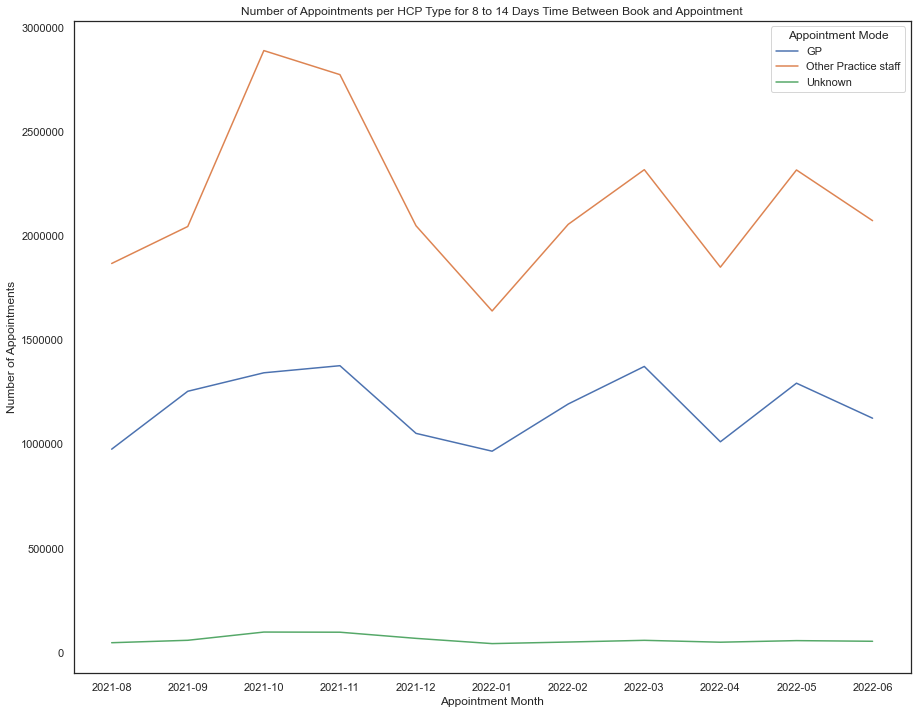

In [1091]:
# Plot a lineplot to show the relationship of hcp for 8 to 14 days 
eight_fourteen_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='hcp_type', data=type_8_14, ci=None)

# Customise and tidy the graph
eight_fourteen_ax.legend(title='Appointment Mode', bbox_to_anchor=(1, 1))
eight_fourteen_ax.set_xlabel('Appointment Month')
eight_fourteen_ax.set_ylabel('Number of Appointments')
eight_fourteen_ax.set_title(
    "Number of Appointments per HCP Type for 8 to 14 Days Time Between Book and Appointment")
eight_fourteen_ax.set_yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000])
eight_fourteen_ax.set_yticks([250000, 750000, 1250000, 1750000,
                     2250000, 2750000], minor=True)
eight_fourteen_ax.set_yticklabels(['0', '500000', '1000000', '1500000', '2000000', '2500000',
                          '3000000'])

plt.savefig('eight_fourteen_ax.png')

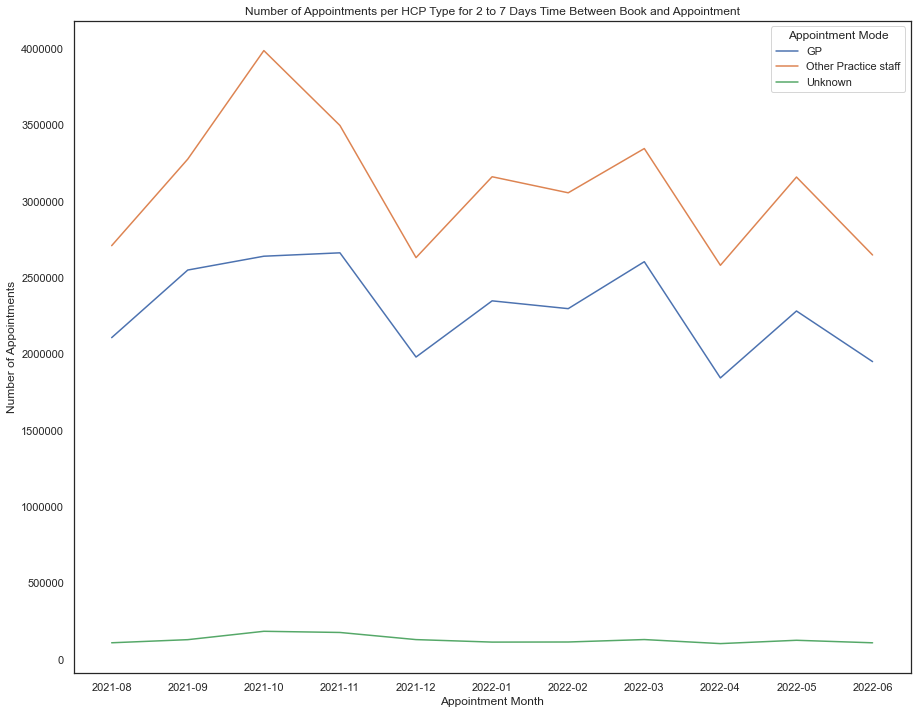

In [1092]:
# Plot a lineplot to show the relationship of hcp for 2 to 7 days 
two_seven_ax = sns.lineplot(x='appointment_month', y='count_of_appointments',\
             hue='hcp_type', data=type_2_7, ci=None)


# Customise and tidy the graph
two_seven_ax.legend(title='Appointment Mode', bbox_to_anchor=(1, 1))
two_seven_ax.set_xlabel('Appointment Month')
two_seven_ax.set_ylabel('Number of Appointments')
two_seven_ax.set_title(
    "Number of Appointments per HCP Type for 2 to 7 Days Time Between Book and Appointment")
two_seven_ax.set_yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000])
two_seven_ax.set_yticks([250000, 750000, 1250000, 1750000,
                     2250000, 2750000, 3250000, 3750000], minor=True)
two_seven_ax.set_yticklabels(['0', '500000', '1000000', '1500000', '2000000', '2500000',
                          '3000000', '3500000', '4000000'])

plt.savefig('two_seven_ax.png')

Insight: 

Increase in both GP and Other Practice Staff hcp types for appointments in the months where there is also an increase in appointments which were not attended. There is a particular increase in the Other Practice Staff appointments in these months, being October 2021, March 2022 and May 2022. 

This similarity in pattern could well signify that appointments with a time of both 2 and 7 days & 8 to 14 days between book and appointment are responsible for a high proportion of unattended appointments. Other Practice staff appointments is the top hcp type for both times. Is this the cause of unattended appointments. To analyse this further I filtered Did Not Attend appointments by hcp type which is below. 
 
Should be noted that:

These are also the busiest months in general for appointments - more appointments the more that are not attended.

Other Practice Staff appointments are also likely to be common for both 2 and 7 days & 8 to 17 days - as GP appointments are generally going to be Same Day appointments. Might just be commonality rather than cause.

Lastly, the data collection for HCP Type was poor as per the MetaData: "Healthcare professional type (HCP type) was incorrectly extracted for some practices from October 2017 onwards. This has led to potential incorrect reporting of some HCP Types, including nurses. The only HCP type currently collected with high enough consistency for  publication is GP. Therefore, all other HCP types are reported as 'Other Practice Staff' throughout this release". 

Therfore, where possible the NHS should look into reducing the amount of GP appointments with a time between book and appointment of 8 to 14 days and 2 to 7 Days.

&ensp;

Wanted to take further investigation to understand the relationship between Did Not Attend appointments and hcp type. 

Therefore, I created a new dataframes where DNA appointments was grouped by hcp_type and where analysis could also be run to look at percentage of missed appointments. 

In [815]:
dna_type = dna.groupby(['appointment_month', 'hcp_type', 'appointment_status']).sum().reset_index()
dna_type.head()

,appointment_month,hcp_type,appointment_status,count_of_appointments
0,2021-08,GP,DNA,272890
1,2021-08,Other Practice staff,DNA,655689
2,2021-08,Unknown,DNA,20558
3,2021-09,GP,DNA,393477
4,2021-09,Other Practice staff,DNA,902812


In [816]:
dna_type[dna_type['hcp_type'] == 'GP'].sort_values(by='count_of_appointments', ascending=False).head()

,appointment_month,hcp_type,appointment_status,count_of_appointments
6,2021-10,GP,DNA,441233
3,2021-09,GP,DNA,393477
9,2021-11,GP,DNA,389228
21,2022-03,GP,DNA,383868
27,2022-05,GP,DNA,366195


In [817]:
dna_type[dna_type['hcp_type'] == 'Other Practice staff']\
.sort_values(by='count_of_appointments', ascending=False).head()

,appointment_month,hcp_type,appointment_status,count_of_appointments
7,2021-10,Other Practice staff,DNA,1091576
10,2021-11,Other Practice staff,DNA,1003396
4,2021-09,Other Practice staff,DNA,902812
22,2022-03,Other Practice staff,DNA,881640
13,2021-12,Other Practice staff,DNA,848447


Subsetted the DNA DataFrame to just focus on the appointment type so that I could then plot an lineplot to visualise the trends between type and not attending appointments over the months studied.

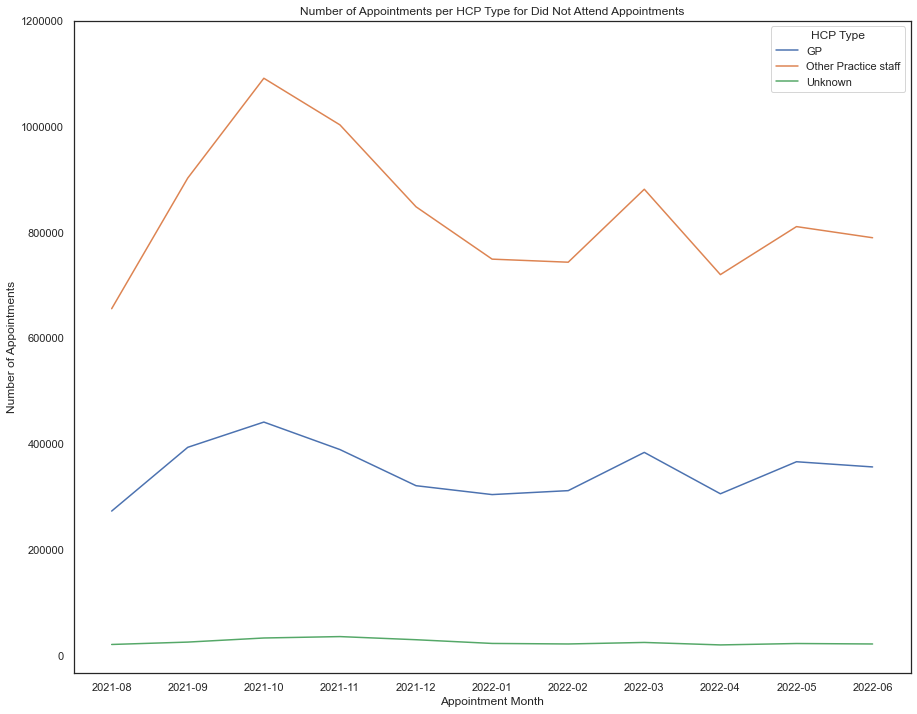

In [1087]:
dna_type_ax = sns.lineplot(
    x='appointment_month', y='count_of_appointments', hue='hcp_type', data=dna_type, ci=None)

# Customise and tidy the graph
dna_type_ax.legend(title='HCP Type', loc='upper right')
dna_type_ax.set_xlabel('Appointment Month')
dna_type_ax.set_ylabel('Number of Appointments')
dna_type_ax.set_title(
    "Number of Appointments per HCP Type for Did Not Attend Appointments")
dna_type_ax.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
dna_type_ax.set_yticks([100000, 300000, 500000, 700000,
                        900000, 1100000], minor=True)
dna_type_ax.set_yticklabels(['0', '200000', '400000', '600000',
                             '800000', '1000000', '1200000'])

plt.savefig('dna_type_ax.png')

As clearly demonstrated from the lineplot above 'Other Practice Staff' appointments are responsible for a significantly higher proportion of unattended appointments than GP appointments. 

At the peak month for both HCP types is October 2021 where Other Practice Staff experiences 1091576 compared to 441233 for GP appointments. Over a million in one month for one HCP type is a considerable amount. It is almost the maximum appointments the NHS appointments can accommodate in one day (1,200,000) - losing almost one day’s appointments in a month is not efficient. 

Additionally, whilst the argument could be made that October in the busiest month for appointments, looking at the type_ax lineplot reproduced below 'Other Practice staff' and General Practice are reasonably similar in terms of number of appointments for this month, so why is there such a disproportion in the number of the unattended appointments for Other Practice staff. Clearly, Other Practice staff appointments contribute more to the number of missed appointments than other HCP Types. As can be seen by the table below (ocp_dna), in every month at least 6% of all appointments for Other Practice Staff are unattended - with a high of 7.31%. This is a lot of appointments to have missing on a consistent basis – over a fifth of appointments every month are unattended.

Interestingly, in October 2021 there is a fall in the Number of General Practice appointments from the previous month (14487785 - 14300751) yet there is an increase in the number of missed appointments (393477 - 441233). Looking at a timeline for Covid-19 pandemic (https://www.instituteforgovernment.org.uk/charts/uk-government-coronavirus-lockdowns) there were new measures introduced in September to counteract the pressure the NHS was coming under due to increase Covid cases, due to the Omicron strain. Perhaps, more people were testing positive due to the new virus and not attending appointments. 

However, whilst this could be true for October 2021 since the turn of the new year, the UK has been relatively Covid free in terms of restrictions and public attitudes. Yet there is still the trend at at least 6% of Other Practice staff appointments are missed a month.

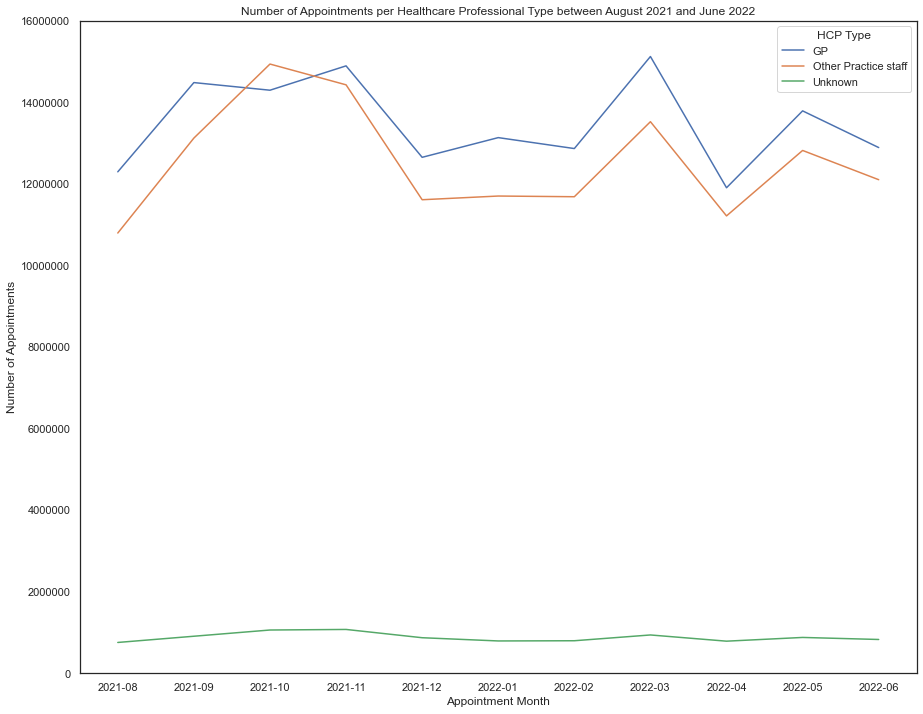

In [1088]:
# Reproduce the lineplot to show how the heatlhcare professionals types differ over time
ar_type_ax = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_type, ci=None)

# Customise and tidy the plot
ar_type_ax.legend(title='HCP Type', loc='upper right')
ar_type_ax.set_xlabel('Appointment Month')
ar_type_ax.set_ylabel('Number of Appointments')
ar_type_ax.set_title(
    "Number of Appointments per Healthcare Professional Type between August 2021 and June 2022")
ar_type_ax.set_yticks([0, 2000000, 4000000, 6000000,
                      8000000, 10000000, 12000000, 14000000, 16000000])
ar_type_ax.set_yticks([1000000, 3000000, 5000000, 7000000,
                      9000000, 11000000, 13000000, 15000000], minor=True)
ar_type_ax.set_yticklabels(['0', '2000000', '4000000', '6000000',
                           '8000000', '10000000', '12000000', '14000000', '16000000'])

plt.savefig('ar_type_ax.png')

In [983]:
# Create a new DataFrame to isolate Other Practice Staff HCP Type
ops_ar = ar_agg[ar_agg['hcp_type'] == 'Other Practice staff']
# Filter new DataFrame futher to group appointments for Other Practice Type
ops_ar_group = ops_ar.groupby(['appointment_month', 'hcp_type']).sum().reset_index()
ops_ar_group

,appointment_month,hcp_type,count_of_appointments
0,2021-08,Other Practice staff,10797821
1,2021-09,Other Practice staff,13126731
2,2021-10,Other Practice staff,14942504
3,2021-11,Other Practice staff,14432800
4,2021-12,Other Practice staff,11614470
5,2022-01,Other Practice staff,11705142
6,2022-02,Other Practice staff,11688107
7,2022-03,Other Practice staff,13528583
8,2022-04,Other Practice staff,11217738
9,2022-05,Other Practice staff,12823200


In [985]:
# Create a new data frame to focus on Other Practice Staff DNA appointments 
ops_dna = dna_type[dna_type['hcp_type'] == 'Other Practice staff']
# Rename column for future merge
ops_dna.rename(columns={'count_of_appointments':'count_dna_appointments'}, inplace=True)
# Merge two df 
ops_dna = pd.merge(ops_dna, ops_ar_group[['appointment_month','count_of_appointments']]
                   ,on='appointment_month', how='left')
# Calculate the percentage appointments that are not attended
ops_dna['percentage_dna'] = ((ops_dna['count_dna_appointments']/ops_dna['count_of_appointments'])*100).round(2)
ops_dna

,appointment_month,hcp_type,appointment_status,count_dna_appointments,count_of_appointments,percentage_dna
0,2021-08,Other Practice staff,DNA,655689,10797821,6.07
1,2021-09,Other Practice staff,DNA,902812,13126731,6.88
2,2021-10,Other Practice staff,DNA,1091576,14942504,7.31
3,2021-11,Other Practice staff,DNA,1003396,14432800,6.95
4,2021-12,Other Practice staff,DNA,848447,11614470,7.31
5,2022-01,Other Practice staff,DNA,749418,11705142,6.40
6,2022-02,Other Practice staff,DNA,743623,11688107,6.36
7,2022-03,Other Practice staff,DNA,881640,13528583,6.52
8,2022-04,Other Practice staff,DNA,720150,11217738,6.42
9,2022-05,Other Practice staff,DNA,810955,12823200,6.32


Created a DataFrame to calculate the percentage of appointments for Other Practice Staff that were not attended. Main insights above but it is notable that 6% or more of Other Practice Staff appointments not attended every month. Consistently high amount of appointments. 

**Question 6:** How do the spread of service settings compare?

In [164]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [165]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_2 = nc.groupby(['appointment_month', 'service_setting']).sum(
    'count_of_appointments').reset_index()
# View the DataFrame.
nc_2.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


In [166]:
# Check data type
nc_2.dtypes

appointment_month        object
service_setting          object
count_of_appointments     int64
dtype: object

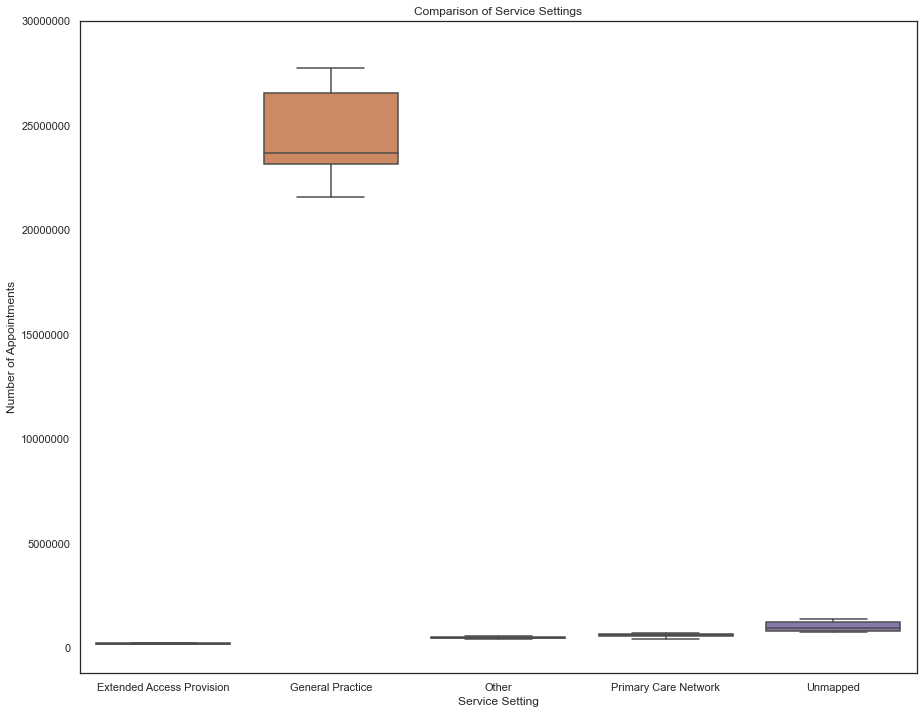

In [1089]:
# Create a boxplot to investigate spread of service settings.
nc_boxplot =  sns.boxplot(data=nc_2, x='service_setting', y='count_of_appointments')

# Customise and tidy the plot
nc_boxplot.set_xlabel('Service Setting')
nc_boxplot.set_ylabel('Number of Appointments')
nc_boxplot.set_title(
    "Comparison of Service Settings")
nc_boxplot.set_yticks([0, 5000000, 10000000, 15000000, 20000000,
                      25000000, 30000000])
nc_boxplot.set_yticks([2500000, 7500000, 12500000, 17500000,
                      22500000, 27500000], minor=True)
nc_boxplot.set_yticklabels(['0', '5000000', '10000000', '15000000',
                           '20000000', '25000000', '30000000'])

plt.savefig('nc_boxplot.png')

Due to the considerable difference between General Practice appointments and the other service setting types the graph is massively skewed - in this instance General Practice could be classified as an outlier. 

Considering the numbers we are dealing with in terms of number of appointments the spead of the Data is actually quite small - being a small difference between the two whiskers as well as the lower quartile and upper quartile. The data is skewed to the right with the median closer to the lower / bottom quartile. 

Because of how much white space there is due to General Practice the next step is to create a df to filter out General Practice.

In [1009]:
# Exclude General Practice 
ex_gp = nc_2[nc_2['service_setting'] != 'General Practice']
ex_gp.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906


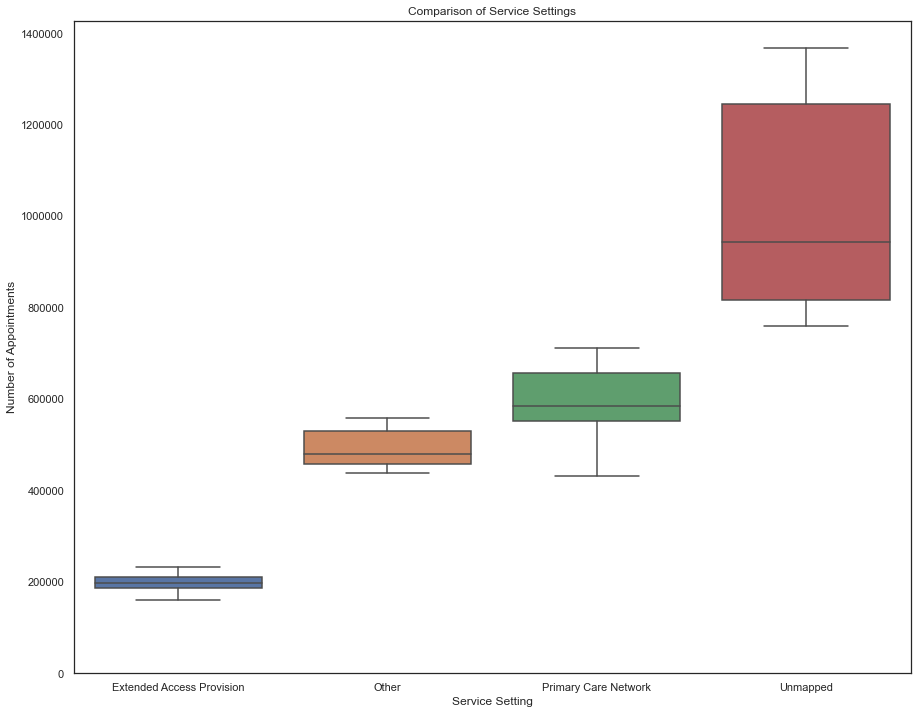

In [1090]:
# Create a boxplot to investigate spread of service settings.
ex_gp_boxplot = sns.boxplot(data=ex_gp, x='service_setting', y='count_of_appointments')

# Customise and tidy the plot
ex_gp_boxplot.set_xlabel('Service Setting')
ex_gp_boxplot.set_ylabel('Number of Appointments')
ex_gp_boxplot.set_title(
    "Comparison of Service Settings")
ex_gp_boxplot.set_yticks([0, 200000, 400000, 600000, 800000,
                      1000000, 1200000, 1400000])
ex_gp_boxplot.set_yticks([100000, 300000, 500000, 700000,
                      900000, 110000, 130000], minor=True)
ex_gp_boxplot.set_yticklabels(['0', '200000', '400000', '600000',
                           '800000', '1000000', '1200000', '1400000'])

plt.savefig('ex_gp_boxplot.png')

Unmapped has a large spread of data with a considerable difference between the two whiskers as well as the lower quartile and upper quartile. Having a large range means a large variability in the data and that the mean value (avg) is not as representative of the data set as a whole. Might suggest poor data collection - the metadata at multiple times (as already highlighted indicated the poor data collection regards unmapped). 

The other service setting is has a good spread of data, suggests there are not too many fluctuations in the appointments for this service setting and that the data collection was good. The data is skewed to the right (positively skewed). The IQR is close together indicating the central portion of the data is grouped together - further indicating a low variability in the data. 

It is a similar story for Primary Care Network, which has a large range of data than the other but isn't significant enough to worry about. Therefore, there isn't too much variance in the values for this service setting. Again the median is closer to the bottom quartile showing the data is positively skewed. 

Again, the issue here is how many records are categorised as unmapped should be noted, ideally we would hope that unmapped would look similar to extended access proivision - where there is a small amount of records and a small spread of data.

### Provide a summary of your findings and recommendations based on the analysis.

Insights into trends: 

Trends in months / seasons and appointments follow a pattern impacted by the holidays in the UK, with falls during Christmas and Easter. Consistently there is a rise in appointments during the autumn which is expected due to change of season and when people tend to fall ill more – spread of colds and viruses etc. 

To be honest there is little the NHS can do to counteract this pattern. It seems very influenced by outside factors from this early analysis. Could look into utilising services during the quieter months more but this would require additional data of the maximum appointments each service can accommodate. 

Recommendations: 

This is diagnostic analysis where suggestions or predicitons can be made but there is little concrete evidence of explanations to trends etc. The NHS needs to conduct more thorough research through predictive and prescriptive analysis. 

Research needs to be conducted into the Other Practice staff appointments and why so many are being unattended. Part of the problem here is Other Practice staff is poorly recorded and essentially is all appointments that aren’t General Practice or Unknown. This is a lot of healthcare types grouped into phrase. Thorough in-depth research needs to be conducted categorise these health care types better, as well as recording the data better, which may then reveal the cause for so many unattended appointments. 

Similarly, the NHS needs to understand why so many patients are not attending appointments with a time between book and appointment of 2 to 7 days and 8 to 14 days. Especially 2 to 7 as these have a high number of appointments. Is it because these tend to be Other Practice Staff appointments or is there an underlying reason.

Research into Primary Care Round service needs to be conducted to see if there is adequate staff and determine the reasoning for the continual rise in appointments. If it continues to increase at the rate it is could become stretched to the point that patients aren’t being cared for effectively. 

Concrete data regarding staff levels needs to be provided not only on a national scale but for also for each location and service. Only then can it be determined if there are adequate levels for both factors. Might find that locations rural locations have too many staff whilst cities are struggling due to higher populations and therefore more individuals registered at one practice. Or that there is too many staff in one service area which could be transferred / retrained to another service which does not have adequate staff. 

Utilise twitter and other social media platforms as a way of gathering information and gauging public mood / perception of the NHS. It is a good source of valuable data and could identify weaknesses or strengths in the NHS. 

Data Collection and Quality

Improve the way in which National Categories are logged. There needs to be an appropriate way to log Inconsistent Mapping as these account for millions of appointments yet logged when a practice wasn’t able to categorise an appointment – these appointments will add value if properly categorised. 

Look into making context type more specific to provide more value to the conversation.

Overall, the major shortcoming throughout this analysis is the data quality and collection. At so many points during this research and analysis there have been issues with data quality such as unmapped and unknown. Many of these issues with the data quality have been recognised in the metadata as well as highlighted during this analysis. Below is a list of some of the key issues with the data quality: 

•	Did not attend (DNA) appointments were not captured correctly: “Due to an issue with the data collection, DNA appointments were not captured correctly after June 2018 and are under-reported until and including November 2018 for all practices using the TPP SystmOne system. ”

•	HCP type was incorrectly extracted for some practices from October 2017 onwards. Only GP was extracted correctly

•	Widespread variation in approach to appointment management between practices resulting in variations in data quality between practices. - A one size fits all model to appointment management might have to be implemented

•	High count of unmapped and unknown appointments